# Joblisting Exploratory Data Analysis (EDA)

## Setup

+ If the following assertions fail, I believe other versions still work. Just ensure you are not using too outdated libraries (e.g. Python 3.* compared to Python 2.*). These are just the versions I'm using for this project.

In [1]:
# General imports.

# Python ≥ 3.7.9 is used.
import sys
assert sys.version_info >= (3, 7, 9)

import os
import re
import time
from itertools import compress


# Specific imports.

# SciPy ≥ 1.6.3 is used.
import scipy
from scipy import stats
assert scipy.__version__ >= "1.6.3"

# NumPy ≥ 1.19.5 is used.
import numpy as np
assert np.__version__ >= "1.18.5"

# Pandas ≥ 1.2.4 is used.
import pandas as pd
assert pd.__version__ >= "1.2.4"

# Matplotlib ≥ 3.4.2 is used.
import matplotlib as mpl
import matplotlib.pyplot as plt
assert mpl.__version__ >= "3.4.2"

# Interactive graphs.
%matplotlib notebook

# Seaborn ≥ 0.11.1 is used.
import seaborn as sns
assert sns.__version__ >= "0.11.1"

# Pandas profiling ≥ 3.0.0 is used.
import pandas_profiling
assert pandas_profiling.__version__ >= "3.0.0"

from pandas_profiling import ProfileReport

# Scikit-learn ≥ 0.24.2 is used.
import sklearn
assert sklearn.__version__ >= "0.24.2"

from sklearn.pipeline import Pipeline
from sklearn.base import TransformerMixin, BaseEstimator


# Imbalanced learn ≥ 0.8.0 is used.
import imblearn
assert imblearn.__version__ >= "0.8.0"

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [2]:
# Utility Function(s).

# Borrowed from: 
# https://github.com/ageron/handson-ml2/blob/master/04_training_linear_models.ipynb.

PROJECT_ROOT_DIR = "."
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images")
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

## Loading the Data

In [3]:
PATH = "../input/joblisting.csv"
df = pd.read_csv(PATH, index_col=0)

In [4]:
df.columns

Index(['company', 'job title', 'headquarters', 'salary estimate', 'job type',
       'size', 'founded', 'type', 'industry', 'sector', 'revenue',
       'job description'],
      dtype='object')

In [5]:
df

,company,job title,headquarters,salary estimate,job type,size,founded,type,industry,sector,revenue,job description
0,Walmart\n3.4,Data Scientist,"Sunnyvale, CA",-1,Job Type : N/A,10000+ employees,1994,company - public,general merchandise & superstores,retail,$10+ billion (usd),Position Summary...\nWhat you'll do...\nAnalyt...
1,TikTok\n3.8,Data Scientist,"Mountain View, CA",-1,Job Type : Full-time,501 to 1000 employees,2016,company - private,internet,information technology,unknown / non-applicable,TikTok is the leading destination for short-fo...
2,Indeed\n4.3,Principal Data Scientist - Candidate Recommend...,"San Francisco, CA",Employer Provided Salary:$187K - $231K,Job Type : Full-time,10000+ employees,2004,company - private,internet,information technology,$2 to $5 billion (usd),Your Job\nThe Candidate Recommendations team b...
3,Indeed\n4.3,Senior Data Scientist - Moderation Engineering,"San Francisco, CA",Employer Provided Salary:$130K - $156K,Job Type : Full-time,10000+ employees,2004,company - private,internet,information technology,$2 to $5 billion (usd),Your Job\nThe Moderation Engineering team’s mi...
4,Thermo Fisher - America\n3.8,Data Scientist III,"San Francisco, CA",-1,Job Type : N/A,10000+ employees,1902,company - public,biotech & pharmaceuticals,biotech & pharmaceuticals,$10+ billion (usd),Thermo Fisher Scientific Inc. is the world lea...
...,...,...,...,...,...,...,...,...,...,...,...,...
2568,First Republic Bank\n4.3,Sales Quantitative Analyst,"San Francisco, CA",$89K - $136K (Glassdoor est.),Job Type : Full-time,1001 to 5000 employees,1985,company - public,banks & credit unions,finance,$10+ billion (usd),"Description\nAt First Republic, we care about ..."
2569,LVIS Corporation,Machine Learning Engineer,"Palo Alto, CA",$94K - $162K (Glassdoor est.),Job Type : Full-time,unknown,-1,company - private,-1,-1,unknown / non-applicable,"Responsibilities\nDevelop, experiment, and ver..."
2570,CooTek\n4.2,"Principal Applied Scientist, Data Science","Mountain View, CA",$109K - $218K (Glassdoor est.),Job Type : Full-time,201 to 500 employees,-1,company - public,-1,-1,unknown / non-applicable,Responsibilities\nBuild Chatbot to distribute ...
2571,Agama Solutions\n3.7,BSA Data Science,"San Francisco, CA",$102K - $166K (Glassdoor est.),Job Type : Full-time,51 to 200 employees,-1,contract,computer hardware & software,information technology,$10 to $25 million (usd),Minimum Job-Specific Skills/Qualifications Req...


In [6]:
df.head()

,company,job title,headquarters,salary estimate,job type,size,founded,type,industry,sector,revenue,job description
0,Walmart\n3.4,Data Scientist,"Sunnyvale, CA",-1,Job Type : N/A,10000+ employees,1994,company - public,general merchandise & superstores,retail,$10+ billion (usd),Position Summary...\nWhat you'll do...\nAnalyt...
1,TikTok\n3.8,Data Scientist,"Mountain View, CA",-1,Job Type : Full-time,501 to 1000 employees,2016,company - private,internet,information technology,unknown / non-applicable,TikTok is the leading destination for short-fo...
2,Indeed\n4.3,Principal Data Scientist - Candidate Recommend...,"San Francisco, CA",Employer Provided Salary:$187K - $231K,Job Type : Full-time,10000+ employees,2004,company - private,internet,information technology,$2 to $5 billion (usd),Your Job\nThe Candidate Recommendations team b...
3,Indeed\n4.3,Senior Data Scientist - Moderation Engineering,"San Francisco, CA",Employer Provided Salary:$130K - $156K,Job Type : Full-time,10000+ employees,2004,company - private,internet,information technology,$2 to $5 billion (usd),Your Job\nThe Moderation Engineering team’s mi...
4,Thermo Fisher - America\n3.8,Data Scientist III,"San Francisco, CA",-1,Job Type : N/A,10000+ employees,1902,company - public,biotech & pharmaceuticals,biotech & pharmaceuticals,$10+ billion (usd),Thermo Fisher Scientific Inc. is the world lea...


In [7]:
# Reading in our new batch of data.
PATH_1 = r"D:\datasets\tabular\regression\joblisting\joblisting_1.csv"
new_data = pd.read_csv(PATH_1)
new_data = new_data.drop(columns=["Unnamed: 0"])
new_data.head()

,company,job title,headquarters,salary estimate,job type,size,founded,type,industry,sector,revenue,job description
0,Roche\n4.3,Principal Data Scientist I (signal processing),"Santa Clara, CA",$118K - $188K (Glassdoor est.),Job Type : Full-time,5001 to 10000 employees,1896,company - public,biotech & pharmaceuticals,biotech & pharmaceuticals,$10+ billion (usd),Impact Healthcare\nRoche Sequencing is develop...
1,Metromile\n4.3,Staff Data Scientist,"San Francisco, CA",$106K - $186K (Glassdoor est.),Job Type : Full-time,201 to 500 employees,2011,company - public,insurance carriers,insurance,unknown / non-applicable,About Us\n\nOn the off chance you've thought a...
2,"Personalis, Inc\n3.9","Sr. Scientist, Product Development","Menlo Park, CA",$75K - $162K (Glassdoor est.),Job Type : Full-time,201 to 500 employees,2011,company - public,biotech & pharmaceuticals,biotech & pharmaceuticals,$25 to $50 million (usd),Personalis is a rapidly growing cancer genomic...
3,LGC Limited\n3.5,Senior Scientist,"Petaluma, CA",$73K - $176K (Glassdoor est.),Job Type : Full-time,1001 to 5000 employees,1842,company - private,biotech & pharmaceuticals,biotech & pharmaceuticals,unknown / non-applicable,Seeking a highly motivated individual for empl...
4,"Alkahest, Inc.",Scientist - MS Proteomics,"San Carlos, CA",$91K - $187K (Glassdoor est.),Job Type : Full-time,-1,-1,-1,-1,-1,-1,Scientist - MS Proteomics\nUniquely positioned...


In [8]:
df = pd.concat([df, new_data], ignore_index=True)

In [9]:
df.shape

(1766, 12)

## Framing the Problem

##### Objective

+ Wrangle, clean, and perform Exploratory Data Analysis (EDA) on the Glassdoor.com joblisting data. Extract useful findings in relationships between estimated salary and other variables.

##### Procedure

1. Setup.
2. Loading the data.
3. Framing the problem.
4. Preview the data.
5. Wrangling and cleaning the data.
6. Univariate non-graphical analysis.
7. Univariate graphical analysis.
8. Multivariate non-graphical analysis. 
9. Multivariate graphical analysis.
10. Organize findings.

Disclaimer: Steps aren't necessarily done sequentially (I may jump back and forth a bit if I come up with an idea about something).

##### Design

+ 7 total Google sheets will be continually updated throughout the project: 6 sheets for assumption_univariate, conclusion_univariate, and observation_univariate (assumption_multivariate, conclusion_multivariate, observation_multivariate). The last sheet is called miscellaneous_observations and will contain observations about things other than the features themselves.
+ P.S: regardless of what happens to our attributes (whether we add or delete attributes), these main sheets will always *at least* have the original attributes plus any additional attributes.

|              | assumptions              | conclusions              | observations              |
| :----------- | :----------------------- | :----------------------- | :------------------------ |
| univariate   | assumptions_univariate   | conclusions_univariate   | observations_univariate   |
| multivariate | assumptions_multivariate | conclusions_multivariate | observations_multivariate |

+ Assumptions will be updated mostly at the beginning of the project (can still be updated all throughout the project).
+ Conclusions will mostly be done during and at the end of the project (can still be updated all throughout the project). 
+ Observations will, unlike the previous 2, be updated all throughout the project.


+ As for this project, I created a diagram to go along and keep track of all the edits I've made. I call this my **edit log**.
+ Note: for the 6 sheets I showed in a markdown table above, the assumptions, conclusions, and observations will be denoted by [row, column] and for miscellaneous_observations sheet, I will denote it by [row,].
+ Note: I might be reshuffling the columns in the df but the order of the columns in the sheets will not change. 


+ I will use a functional design (creating functions for whatever needs this ability) and leaving the rest alone. 
+ I'll try to adhere by Python conventions in PEP8 and [this](https://stackoverflow.com/questions/43577404/purpose-of-import-this) (though I can't promise this will turn out perfectly).

##### Initial Univariate Assumptions

'company':

+ I've spent a great deal of time on Glassdoor.com's joblisting webpage. That combined with my previous understanding of jobs, I would say that larger and more prominent tech companies like Facebook and TikTok will have more joblistings compared to startups.

'job title':

+ I believe most job titles will probably ask for something along the lines of just a data scientist (not senior data scientist, as I am assuming, those are harder to find).

'headquarters':

+ I presume most headquarters to be located in San Francisco, CA and/or the Silicon Valley area.

'salary estimate':

+ I assume most salary estimates overlap the range of \\$150k to \\$250k.

'job type':

+ Most job types will be full-time and some will be part-time. Other job types will probably be scarcer. 

'size':

+ I'd say the size of the average company is around a few hundred (e.g. 100-200).

'founded':

+ Most companies are founded recently (early 2000s and 2010s).

'type':

+ Most companies will be either public or private.

'industry':

+ Most companies will be in the Information Technology/High Tech industry.

'sector':

+ Sector follows suit with industry.

'revenue':

+ Revenue for larger companies will be in the billions! Revenue for smaller companies may be excluded or in the millions.

'job description':

+ This is a text field but I'm still going to make an assumption. I assume that the job description will mostly have information about company environment, objective, and prospects.


Disclaimer: My assumptions are based on prior knowledge or common knowledge and they can definitely be incorrect.

**Note**: All my assumptions (both initial, during, and after the project) will be collected nicely in a spreadsheet called assumptions_univariate. Initial and final assumptions are included in this notebook for reference.

##### Initial Multivariate Assumptions 

| N/A | Irrelevant       | Small       | Medium       |  Large       |
| :-- | :--------------- | :---------- | :----------- | :----------- |

'company':

+ I predict company will have a **large** significance to the estimated salary as larger companies can not only afford to hire more and produce more joblistings in Glassdoor.com, but they can also raise the estimated salaries in return for potential employee appeal and demand! From common knowledge, prestigious companies for tech tend to pay more as that is why the F.A.N.G acronym is so widely used. 

'job title':

+ **Irrelevant** as it is just a job title. However, this may raise some interests from the job seeker's perspective. For instance, if a job seeker is hunting for a prestigious data science job title (e.g. Principal Data Scientist or Senior Data Scientist), then the title may be worth something in terms of work experience and resumé building. Actually, it just hit me: a more prestigious title would boast a larger salary compared to a smaller job title. Though I initially assumed this one to be irrelevant, I deem this one **small** in terms of significance —but it still might be irrelevant in terms of the data!

'headquarters':

+ I predict headquarters will be of **medium** significance to the estimated salary. The headquarters are indicative of the general location of the work place (I presume with what knowledge I have now). Since headquarters is based primarily on geographics and region and environment, places more concentrated (concentrated with tech and hotspots for the data science and computer science job market) will likely provide larger salary estimates compared to places that aren't as concentrated.

'salary estimate':

+ **N/A** because salary estimate cannot contribute to itself!

'job type':

+ I predict job type to have a **large** significance to the estimated salary. This is because different job positions pay differently. Full-time jobs pay larger salaries than part-time. Internships are temporary and some may be unpaid (from my knowledge, most internships are lower than full-time or part-time jobs).

'size':

+ Size here refers to the number of employees at the company. I predict this is of **medium** significance to the estimated salary. This is because, although the size is not entirely useless as it may be a sign of how large the company is and how popular it is (and thus larger companies have larger salaries), it might be less popular to assess a salary estimate by the size of the company (an assumption).

'founded':

+ I believe the year founded is of **small** to **irrelevant** significance to the salary. This is because (I presume) a company founded ages ago may or may not be large enough to provide a larger salary. And similarly, a company founded recently could have shot up through the market to afford to pay larger (or smaller if their previous salaries were overly generous) salaries. And thus, there might be no surefire way to guarantee that there is a strong relationship between the year founded and the estimated salary. 

'type':

+ I predict the type of the company will have **medium** significance to the salary as working for a company may pay more than being self-employed. However, I have an underlying assumption about its effectiveness compared to location (headquarters) or company. 

'industry':

+ I say this has **medium** significance because industries in tech and information technology will have an edge in todays day and age of computers.

'sector':

+ I also say this has **medium** significance as it is similar to industry.

'revenue':

+ I think the company's revenue has a **large** significance to the salary because the company revenue will directly impact the largeness or smallness of the salary.

'job description':

+ **Irrelevant** as it is simply a description on a website (and the description can be entirely different depending on website).

Disclaimer: My assumptions are based on prior knowledge or common knowledge and they can definitely be incorrect.

**Note**: All my assumptions (both initial, during, and after the project) will be collected nicely in a spreadsheet called assumptions_multivariate. Initial and final assumptions are included in this notebook for reference.

## Previewing the Data

In [10]:
df.head()

,company,job title,headquarters,salary estimate,job type,size,founded,type,industry,sector,revenue,job description
0,Walmart\n3.4,Data Scientist,"Sunnyvale, CA",-1,Job Type : N/A,10000+ employees,1994,company - public,general merchandise & superstores,retail,$10+ billion (usd),Position Summary...\nWhat you'll do...\nAnalyt...
1,TikTok\n3.8,Data Scientist,"Mountain View, CA",-1,Job Type : Full-time,501 to 1000 employees,2016,company - private,internet,information technology,unknown / non-applicable,TikTok is the leading destination for short-fo...
2,Indeed\n4.3,Principal Data Scientist - Candidate Recommend...,"San Francisco, CA",Employer Provided Salary:$187K - $231K,Job Type : Full-time,10000+ employees,2004,company - private,internet,information technology,$2 to $5 billion (usd),Your Job\nThe Candidate Recommendations team b...
3,Indeed\n4.3,Senior Data Scientist - Moderation Engineering,"San Francisco, CA",Employer Provided Salary:$130K - $156K,Job Type : Full-time,10000+ employees,2004,company - private,internet,information technology,$2 to $5 billion (usd),Your Job\nThe Moderation Engineering team’s mi...
4,Thermo Fisher - America\n3.8,Data Scientist III,"San Francisco, CA",-1,Job Type : N/A,10000+ employees,1902,company - public,biotech & pharmaceuticals,biotech & pharmaceuticals,$10+ billion (usd),Thermo Fisher Scientific Inc. is the world lea...


In [11]:
df.shape

(1766, 12)

In [12]:
df.columns

Index(['company', 'job title', 'headquarters', 'salary estimate', 'job type',
       'size', 'founded', 'type', 'industry', 'sector', 'revenue',
       'job description'],
      dtype='object')

In [13]:
df.index

RangeIndex(start=0, stop=1766, step=1)

In [14]:
df.describe()


# observation_univariate: [0, "founded"].

# All the values for the "founded" feature are biased
# because they have a great deal of missing values (-1)
# and this would skew both the mean, std, and the median and quartiles.


# conclusion_univariate: [0, "founded"].

# It seems that most of the joblistings come from companies
# founded in the early 2000s. Here is my reasoning: 
# the jump from quartile 1 (Q1) to quartile 2 (Q2/median)
# is 18 years while the jump from Q2 to Q3 is only 12 years.
# This implies that there are more joblistings located within this region as 
# the difference is smaller.

,founded
count,1766.000000
mean,1440.555493
std,891.602525
min,-1.000000
25%,-1.000000
50%,1994.000000
75%,2010.000000
max,2019.000000


In [15]:
df.info()


# misc_obsvtn: [0,].

# There are no null or NaN values but they are actually represented as -1s.
# Everything is an object except for the year founded which is int64.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1766 entries, 0 to 1765
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   company          1766 non-null   object
 1   job title        1766 non-null   object
 2   headquarters     1766 non-null   object
 3   salary estimate  1766 non-null   object
 4   job type         1766 non-null   object
 5   size             1766 non-null   object
 6   founded          1766 non-null   int64 
 7   type             1766 non-null   object
 8   industry         1766 non-null   object
 9   sector           1766 non-null   object
 10  revenue          1766 non-null   object
 11  job description  1766 non-null   object
dtypes: int64(1), object(11)
memory usage: 165.7+ KB


## Wrangling and Cleaning the Data

In [16]:
df.head()

,company,job title,headquarters,salary estimate,job type,size,founded,type,industry,sector,revenue,job description
0,Walmart\n3.4,Data Scientist,"Sunnyvale, CA",-1,Job Type : N/A,10000+ employees,1994,company - public,general merchandise & superstores,retail,$10+ billion (usd),Position Summary...\nWhat you'll do...\nAnalyt...
1,TikTok\n3.8,Data Scientist,"Mountain View, CA",-1,Job Type : Full-time,501 to 1000 employees,2016,company - private,internet,information technology,unknown / non-applicable,TikTok is the leading destination for short-fo...
2,Indeed\n4.3,Principal Data Scientist - Candidate Recommend...,"San Francisco, CA",Employer Provided Salary:$187K - $231K,Job Type : Full-time,10000+ employees,2004,company - private,internet,information technology,$2 to $5 billion (usd),Your Job\nThe Candidate Recommendations team b...
3,Indeed\n4.3,Senior Data Scientist - Moderation Engineering,"San Francisco, CA",Employer Provided Salary:$130K - $156K,Job Type : Full-time,10000+ employees,2004,company - private,internet,information technology,$2 to $5 billion (usd),Your Job\nThe Moderation Engineering team’s mi...
4,Thermo Fisher - America\n3.8,Data Scientist III,"San Francisco, CA",-1,Job Type : N/A,10000+ employees,1902,company - public,biotech & pharmaceuticals,biotech & pharmaceuticals,$10+ billion (usd),Thermo Fisher Scientific Inc. is the world lea...


##### company and rating

In [17]:
# Looking at all unique values and their counts for 
# the "company" attribute and sorting by ascending.
companies = df["company"].value_counts()
companies

Facebook\n4.3                         60
Ursus\n4.4                            43
Uber\n4.0                             34
Salesforce\n4.4                       25
Intuit - Data\n4.5                    24
                                      ..
Match Group\n4.0                       1
Creative Circle\n3.7                   1
Opinion Dynamics                       1
Opsani\n5.0                            1
BISHOP WISECARVER CORPORATION\n3.5     1
Name: company, Length: 667, dtype: int64

In [18]:
# Looking through the unique companies and finding the index where the rating is missing.
idx_of_missing_rates = [company for company in companies.index if "\n" not in company]

In [19]:
# Checking if there are any duplicates for companies with a missing rating.
# No duplicates!
len(idx_of_missing_rates), len(set(idx_of_missing_rates))

(135, 135)

In [20]:
idx_of_missing_rates


# observations_univariate: [0, "company"].

# Some companies have multiple joblistings and there may or may not be ratings.


# conclusions_univariate: [0, "company"].

# There are 418 unique companies (some may be duplicates if they have multiple joblistings
# and they exclude or include the rating randomly). Of those 418 unique companies, 66 of them
# do not have ratings! Of those 66, there are no duplicates. 
# Edit: 66 now is 135.

['Alto Neuroscience, Inc.',
 'TrueBinding',
 'Sisu',
 'Health at Scale Corporation',
 'Parker Institute of Cancer Immunotherapy (PICI)',
 'Cotocus',
 '3T Biosciences',
 'TCL Research America',
 'HopHR',
 'REDICA Systems',
 'Apostle',
 'a.k.a. Brands',
 'Luminostics',
 'Lighthouse Lab Services',
 'NewsBreak',
 'ELT Solutions',
 "Warman O'Brien",
 'Cavnue',
 'Accrete Hitech Solutions',
 'Waynsys',
 'TSN Partners',
 'Pendulum™',
 'Food Management Search',
 'Charles River',
 'Aridis Pharmaceuticals',
 'Alkahest, Inc.',
 'AmpersandPeople',
 "Gayathri's Sandbox",
 'Concept Tapestry',
 'PrimeNeuro',
 'Beepi',
 'Circularis Biotechnologies',
 'Commonstock',
 'G4S',
 'Abl Schools',
 'Celandyne Software Solutions',
 'Bioethic Consulting',
 'KLM Careers',
 'Varo Money',
 'Apollomics',
 'Artius',
 'BioEclipse Therapeutics, Inc.',
 'Solactron',
 'Big Fish Games',
 'VertiSystem Inc',
 'Compassion Pathways',
 'Iron Ox',
 'Keewi',
 'HypaHub, Inc.',
 'Gamma Reality Inc.',
 'V Projects',
 'Monterey Bay A

In [21]:
# conclusions_univariate: [1, "company"].

# About 12.61% of all instances in the dataset don't have ratings.


companies[idx_of_missing_rates].sum()/df.shape[0]

# Since my threshold for ignoring a possible feature is ≥ 15%,
# this qualifies to be a new feature as it is below the threshold.
# Edit: 15.74% and my threshold has risen to 20% to compensate
# for the larger dataset.

0.15741789354473387

In [22]:
# The number after the df is used to specify the version.
# I will be making copies of my df to preserve each step. 
df_1 = df.copy()
company_rating = (df_1["company"]
                  .apply(lambda company: pd.Series(company.split("\n")))
                  .set_axis(["company", "rating"], axis=1))
df_1["company"] = company_rating["company"]
df_1.insert(1, "rating", company_rating["rating"])

In [23]:
df_1.head()

,company,rating,job title,headquarters,salary estimate,job type,size,founded,type,industry,sector,revenue,job description
0,Walmart,3.4,Data Scientist,"Sunnyvale, CA",-1,Job Type : N/A,10000+ employees,1994,company - public,general merchandise & superstores,retail,$10+ billion (usd),Position Summary...\nWhat you'll do...\nAnalyt...
1,TikTok,3.8,Data Scientist,"Mountain View, CA",-1,Job Type : Full-time,501 to 1000 employees,2016,company - private,internet,information technology,unknown / non-applicable,TikTok is the leading destination for short-fo...
2,Indeed,4.3,Principal Data Scientist - Candidate Recommend...,"San Francisco, CA",Employer Provided Salary:$187K - $231K,Job Type : Full-time,10000+ employees,2004,company - private,internet,information technology,$2 to $5 billion (usd),Your Job\nThe Candidate Recommendations team b...
3,Indeed,4.3,Senior Data Scientist - Moderation Engineering,"San Francisco, CA",Employer Provided Salary:$130K - $156K,Job Type : Full-time,10000+ employees,2004,company - private,internet,information technology,$2 to $5 billion (usd),Your Job\nThe Moderation Engineering team’s mi...
4,Thermo Fisher - America,3.8,Data Scientist III,"San Francisco, CA",-1,Job Type : N/A,10000+ employees,1902,company - public,biotech & pharmaceuticals,biotech & pharmaceuticals,$10+ billion (usd),Thermo Fisher Scientific Inc. is the world lea...


In [24]:
df_1.company.value_counts()


# conclusions_univariate: [2, "company"].

# There seems to be a lot of companies posting just
# one joblisting making it difficult to use for machine learning.
# I could try different methods of sampling, but I'll hold off on this for now.

Facebook                     61
Ursus                        43
Salesforce                   37
Uber                         34
Intuit - Data                24
                             ..
Jerry                         1
NextEra Energy                1
Carmot Therapeutics, Inc.     1
Oxford Global Resources       1
StubHub                       1
Name: company, Length: 647, dtype: int64

In [25]:
for company in list(df_1["company"].values):
    if "-1" in company: print("Missing company.")

        
# conclusions_univariate: [3, "company"].

# Company has no missing values.
# They also have no outliers. I'm not going to RegEx parse
# them because company naming on Glassdoor.com is consistent.

In [26]:
# observations_univariate: [0, "rating"].

# Since rating comes from company, idx_of_missing_rates will specify the NaN ratings.
# However, since some companies may have joblistings with or without ratings,
# the idx_of_missing_rates becomes obsolete. 

In [27]:
# conclusions_univariate: [0, "rating"].

# As expected, there are 121 NaNs. Edit: 278.


# 121 NaNs/959 instances = 12.61% of all ratings are NaNs.
# Edit: 278/1766 = 15.74% of all ratings are NaNs.
df_1.rating.isna().sum()

278

In [28]:
# We will fill out the NaNs in a special way: the "rating" will be 
# filled in based on "company" names. The rest will be filled out 
# via an average.

# First, we must convert "rating" to a float64.
df_1.rating = df_1.rating.astype("float64")

# Then we must check if we can actually fill out "rating" by company.

# We first look at the average rating for each company.
# Note: https://stackoverflow.com/questions/54106112/pandas-groupby-mean-not-ignoring-nans.
# .mean() ignores NaNs so we don't have to worry about the case
# where a company has multiple joblistings where some have a rating and some don't.

# Companies with multiple joblistings, some with ratings and some without, will 
# still display an average rating number. We are simply finding which company
# (regardless of how many joblistings) is not posting a rating.
avg_cmpny_ratings = df_1.groupby("company").mean()["rating"]

# Then we get a bool array of which companies have no ratings.
no_rating = avg_cmpny_ratings.isna().values

# We extract the list of companies without ratings.
# Note: These are the companies who, regardless of how many joblistings,
# don't have any rating attached to any of their joblistings.
no_rating_cmpny = avg_cmpny_ratings.index[no_rating]

no_rating_companies = pd.Series(dtype=np.float64)
for company in no_rating_cmpny:
    no_rating_companies = pd.concat([no_rating_companies, 
                                     pd.Series(df_1[df_1.company == company]["rating"])])

# The length of the series no_rating_companies is printed out
# with the number of NaNs. 
# Basically, this 119 means that of the 121 missing ratings,
# 119 of them are from companies who regardless of how many joblistings they 
# posted, never placed a rating on any of their joblistings.
# Edit: These numbers are now 267 and 278 respectively.
print(len(no_rating_companies), no_rating_companies.isna().sum())


# conclusions_univariate: [1, "rating"].

# This means that out of all missing ratings, only 2 companies posted
# multiple joblistings where they list a rating on one joblisting
# but not on the other. Edit: There are now 6 companies.


# Alternatively, you can simply find all the unique companies.
# Then for each unique company, slice the DataFrame based on that company,
# and check if the ratings column has both NaNs and floats.
# If they do, then append the name of the company to an array or list.
# This approach is simpler but is iterative and may cause issues if
# the dataset is too large.

267 267


In [29]:
# And that conclusion is verified here:
len(idx_of_missing_rates), len(no_rating_cmpny)

(135, 129)

In [30]:
# These are the 2 companies. Edit: a new batch of data has brought 
# this to a total of 6 companies.
companies_with_ratings = set(idx_of_missing_rates).difference(set(no_rating_cmpny))
companies_with_ratings

{'Big Fish Games',
 'CA-One Tech Cloud Inc',
 'Facebook',
 'Surya Systems',
 'TCL Research America',
 'Varo Money'}

In [31]:
df_1[df_1.company == "Facebook"]["rating"]

189     4.3
236     NaN
238     4.3
293     4.3
306     4.3
       ... 
945     4.3
955     4.3
1047    4.3
1052    4.3
1053    4.3
Name: rating, Length: 61, dtype: float64

In [32]:
df_1[df_1.company == "Surya Systems"]["rating"]

265    NaN
627    4.0
Name: rating, dtype: float64

In [33]:
df_1[df_1.company == "Big Fish Games"]["rating"]

237     3.2
1184    NaN
1245    NaN
Name: rating, dtype: float64

In [34]:
df_1[df_1.company == "CA-One Tech Cloud Inc"]["rating"]

1276    NaN
1614    5.0
Name: rating, dtype: float64

In [35]:
df_1[df_1.company == "TCL Research America"]["rating"]

591     NaN
768     NaN
919     NaN
949     NaN
1328    4.0
Name: rating, dtype: float64

In [36]:
df_1[df_1.company == "Varo Money"]["rating"]

1159    NaN
1219    NaN
1357    3.7
1415    3.7
1569    3.7
1592    3.7
1637    3.7
1641    3.7
1656    3.7
1702    3.7
1716    3.7
1746    3.7
Name: rating, dtype: float64

In [37]:
# Now we fill them in by company.

# Here is a reusable function.
def fill_nans_with_cmpny_avg_rating(cmpny_set):
    for company in cmpny_set:
        ratings = df_1[df_1.company == company]["rating"]
        ratings_nans = ratings[ratings.isna().values]
        nan_idx = list(ratings_nans.index)
        ratings_avg = round(ratings.mean(), 1)
        for idx in nan_idx:
            df_1.at[idx, "rating"] = ratings_avg
        
fill_nans_with_cmpny_avg_rating(companies_with_ratings)

In [38]:
# Verifying that it works.
df_1.rating.isna().sum()  # Checking the total number of NaNs in the rating col (original was 121).
# Edit: 278.

267

In [39]:
# Filling the rest of the ratings with the global average rating of 4.1.
avg_rating = round(df_1.rating.mean(), 1)

df_1.rating = df_1.rating.fillna(avg_rating)

In [40]:
df_1.rating.isna().sum()  # Success.

0

##### job title

In [41]:
job_titles = df_1["job title"]
df_2 = df_1.drop(columns="job title")

##### headquarter

In [42]:
df_2.headquarters.isna().sum(), df_2.headquarters.unique()


# conclusions_univariate: [0, "headquarters"].

# There are no NaNs and no -1s, however, though the headquarters unique values
# are mostly fine, there seem to be a lot of mix in with what seems to be 
# "job title".

(0,
 array(['Sunnyvale, CA', 'Mountain View, CA', 'San Francisco, CA',
        'United States', 'Sacramento, CA', 'San Jose, CA', 'Livermore, CA',
        'Palo Alto, CA', 'Santa Clara, CA', 'Oakland, CA', 'San Mateo, CA',
        'Los Altos, CA', 'Menlo Park, CA', 'Milpitas, CA',
        'Foster City, CA', 'Morgan Hill, CA', 'Newark, CA',
        'South San Francisco, CA', 'Hayward, CA', 'San Carlos, CA',
        'Fremont, CA', 'Los Gatos, CA', 'Senior Data Scientist',
        'Staff Data Scientist', 'Redwood City, CA', 'Cupertino, CA',
        'Burlingame, CA', 'Emeryville, CA', 'Pleasanton, CA',
        'Half Moon Bay, CA', 'Sausalito, CA', 'Brisbane, CA',
        'Elk Grove, CA', 'Business Data Analyst', 'Pittsburg, CA',
        'Concord, CA', 'East Palo Alto, CA', 'Patterson, CA',
        'Berkeley, CA', 'San Bruno, CA', 'Hercules, CA', 'San Ramon, CA',
        'San Leandro, CA', 'Staff Business Data Analysis',
        'Economist - Machine Learning Engineer',
        'Manager 3 Da

In [43]:
headquarter_value_counts = df_2.headquarters.value_counts()
headquarter_value_counts


# observations_univariate: [0, "headquarters"].

# We can omit the NaNs for where job titles are since there aren't that many.

San Francisco, CA                           670
Menlo Park, CA                              116
San Jose, CA                                105
Mountain View, CA                            99
Santa Clara, CA                              83
                                           ... 
Staff Data Scientist - Product Analytics      1
Staff Machine Learning Engineer               1
Saint Helena, CA                              1
Martinez, CA                                  1
Half Moon Bay, CA                             1
Name: headquarters, Length: 75, dtype: int64

In [44]:
# Since, all actual headquarter locations are located in California, 
# I will parse the indices and simply check which ones don't have CA.

no_ca = headquarter_value_counts.index[headquarter_value_counts.index.map(lambda hq: "CA" not in hq)]
no_ca


# observations_univariate: [1, "headquarters"].

# United States is a location and it is one unique value in the "headquarters" column.
# However, since CA is in the US, having the location of US doesn't help much if there aren't
# joblistings also coming in internationally. We will remove US alongside all the 
# other job titles.

Index(['United States', 'Senior Technical Data Analyst',
       'Senior Data Scientist', 'Business Data Analyst',
       'Staff Business Data Analysis', 'Staff Data Scientist',
       'Staff Business Data Analyst, Ecosystem Fraud Prevention',
       'Group Manager - Data Science', 'Principal Data Scientist',
       'Manager 3 Data and Analytics', 'Staff Business Data Analyst',
       'Economist - Machine Learning Engineer',
       'Staff Data Scientist - Product Analytics',
       'Staff Machine Learning Engineer'],
      dtype='object')

In [45]:
df_2[df_2.headquarters == "United States"]


# observations_univariate: [2, "headquarters"].

# Actually, since most of the U.S. ones are Apple, and after a quick search up,
# I saw that their headquarters was located in Cupertino (which is already a 
# unique value in the headquarters column), I decided to keep Apple and simply replace
# those with "Cupertino, CA". I Will remove the "Mitre Corporation". I searched up their hq
# and noticed it was located in Massachusetts (I could be wrong). I would keep it and simply
# replace their hq with MA or "city, MA" but this rare instance is better off removed.

,company,rating,headquarters,salary estimate,job type,size,founded,type,industry,sector,revenue,job description
10,Mitre Corporation,3.8,United States,-1,Job Type : Full-time,5001 to 10000 employees,1958,nonprofit organization,federal agencies,government,$1 to $2 billion (usd),Why choose between doing meaningful work and h...
45,Apple,4.3,United States,-1,Job Type : N/A,10000+ employees,1976,company - public,computer hardware & software,information technology,$10+ billion (usd),"Summary\nPosted: May 27, 2021\nRole Number:200..."
51,Apple,4.3,United States,-1,Job Type : N/A,10000+ employees,1976,company - public,computer hardware & software,information technology,$10+ billion (usd),"Summary\nPosted: Feb 18, 2021\nWeekly Hours: 4..."
57,Apple,4.3,United States,-1,Job Type : Full-time,10000+ employees,1976,company - public,computer hardware & software,information technology,$10+ billion (usd),"Summary\nPosted: May 27, 2021\nWeekly Hours: 4..."
66,Apple,4.3,United States,-1,Job Type : Full-time,10000+ employees,1976,company - public,computer hardware & software,information technology,$10+ billion (usd),"Summary\nPosted: May 27, 2021\nWeekly Hours: 4..."
72,Apple,4.3,United States,-1,Job Type : N/A,10000+ employees,1976,company - public,computer hardware & software,information technology,$10+ billion (usd),"Summary\nPosted: Feb 18, 2021\nWeekly Hours: 4..."
98,Apple,4.3,United States,-1,Job Type : Full-time,10000+ employees,1976,company - public,computer hardware & software,information technology,$10+ billion (usd),"Summary\nPosted: May 27, 2021\nWeekly Hours: 4..."
100,Apple,4.3,United States,-1,Job Type : Full-time,10000+ employees,1976,company - public,computer hardware & software,information technology,$10+ billion (usd),"Summary\nPosted: May 7, 2021\nWeekly Hours: 40..."
109,Apple,4.3,United States,-1,Job Type : N/A,10000+ employees,1976,company - public,computer hardware & software,information technology,$10+ billion (usd),"Summary\nPosted: May 27, 2021\nRole Number:200..."


In [46]:
# Get the index of Apple company joblistings with a headquarter labeled as "United States".
apple_idx = list(df_2[(df_2.headquarters == "United States") & (df_2.company == "Apple")].index)

df_2.loc[apple_idx, "headquarters"] = "Cupertino, CA"

In [47]:
df_2[df_2.company == "Apple"]  # Success!

,company,rating,headquarters,salary estimate,job type,size,founded,type,industry,sector,revenue,job description
45,Apple,4.3,"Cupertino, CA",-1,Job Type : N/A,10000+ employees,1976,company - public,computer hardware & software,information technology,$10+ billion (usd),"Summary\nPosted: May 27, 2021\nRole Number:200..."
51,Apple,4.3,"Cupertino, CA",-1,Job Type : N/A,10000+ employees,1976,company - public,computer hardware & software,information technology,$10+ billion (usd),"Summary\nPosted: Feb 18, 2021\nWeekly Hours: 4..."
57,Apple,4.3,"Cupertino, CA",-1,Job Type : Full-time,10000+ employees,1976,company - public,computer hardware & software,information technology,$10+ billion (usd),"Summary\nPosted: May 27, 2021\nWeekly Hours: 4..."
66,Apple,4.3,"Cupertino, CA",-1,Job Type : Full-time,10000+ employees,1976,company - public,computer hardware & software,information technology,$10+ billion (usd),"Summary\nPosted: May 27, 2021\nWeekly Hours: 4..."
72,Apple,4.3,"Cupertino, CA",-1,Job Type : N/A,10000+ employees,1976,company - public,computer hardware & software,information technology,$10+ billion (usd),"Summary\nPosted: Feb 18, 2021\nWeekly Hours: 4..."
98,Apple,4.3,"Cupertino, CA",-1,Job Type : Full-time,10000+ employees,1976,company - public,computer hardware & software,information technology,$10+ billion (usd),"Summary\nPosted: May 27, 2021\nWeekly Hours: 4..."
100,Apple,4.3,"Cupertino, CA",-1,Job Type : Full-time,10000+ employees,1976,company - public,computer hardware & software,information technology,$10+ billion (usd),"Summary\nPosted: May 7, 2021\nWeekly Hours: 40..."
109,Apple,4.3,"Cupertino, CA",-1,Job Type : N/A,10000+ employees,1976,company - public,computer hardware & software,information technology,$10+ billion (usd),"Summary\nPosted: May 27, 2021\nRole Number:200..."


In [48]:
# Dropping the other ones.
df_2 = df_2.drop(list(df_2[df_2.headquarters == "United States"].index))

In [49]:
"United States" in df_2.headquarters.unique()  # Success!

False

In [50]:
# Here is a new list of all the other extraneous unique values in "headquarters".
hq_job_titles = df_2.headquarters.unique()[pd.Series(df_2.headquarters.unique()).map(lambda x: "CA" not in x).values]
hq_job_titles

array(['Senior Data Scientist', 'Staff Data Scientist',
       'Business Data Analyst', 'Staff Business Data Analysis',
       'Economist - Machine Learning Engineer',
       'Manager 3 Data and Analytics', 'Principal Data Scientist',
       'Staff Data Scientist - Product Analytics',
       'Staff Business Data Analyst', 'Senior Technical Data Analyst',
       'Staff Machine Learning Engineer', 'Group Manager - Data Science',
       'Staff Business Data Analyst, Ecosystem Fraud Prevention'],
      dtype=object)

In [51]:
is_extraneous = [True if "CA" not in hq else False for hq in df_2.headquarters]
is_extraneous

[False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,


In [52]:
df_2[is_extraneous]


# A lot of this code could've probably been done in different ways.
# My decision to manipulate the data through these pandas functions
# is that it explicitly showcases what I need to do, and how I'll do it
# (even though it might be a bit clunky).


# misc_obsvtn: [1,].

# I was originally going to drop whatever rows have "headquarters" unique values
# corresponding to job_titles however I realized that they
# actually included the headquarters, it was just wrongly placed.


# misc_obsvtn: [2,].

# However, since they are all missing salary estimates (and I cannot infer
# this salary estimate from similar instances), I will simply drop them as they
# don't pose a significant contribution to my dataset (as there are only 9 instances).
# Edit: Not 9 anymore with the introduction of a new batch of data,
# but still negligible compared to the size of the data.

,company,rating,headquarters,salary estimate,job type,size,founded,type,industry,sector,revenue,job description
158,Intuit - Data,4.5,Senior Data Scientist,"Mountain View, CA",Job Type : Full-time,5001 to 10000 employees,1983,company - public,computer hardware & software,information technology,$2 to $5 billion (usd),Overview\nIntuit is looking for innovative and...
159,Intuit - Data,4.5,Staff Data Scientist,"Mountain View, CA",Job Type : Full-time,5001 to 10000 employees,1983,company - public,computer hardware & software,information technology,$2 to $5 billion (usd),Overview\nIntuit is looking for innovative and...
296,Intuit - Data,4.5,Business Data Analyst,"Mountain View, CA",Job Type : Full-time,5001 to 10000 employees,1983,company - public,computer hardware & software,information technology,$2 to $5 billion (usd),"Overview\nIntuit’s Small Business Group (SBG),..."
464,Intuit - Data,4.5,Business Data Analyst,"Mountain View, CA",Job Type : Full-time,5001 to 10000 employees,1983,company - public,computer hardware & software,information technology,$2 to $5 billion (usd),"Overview\nIntuit’s Small Business Group (SBG),..."
617,Intuit - Data,4.5,Staff Business Data Analysis,"Mountain View, CA",Job Type : Full-time,5001 to 10000 employees,1983,company - public,computer hardware & software,information technology,$2 to $5 billion (usd),Overview\nCome join Intuit as a Staff Business...
783,Instacart - Corporate,3.8,Economist - Machine Learning Engineer,"San Francisco, CA",Job Type : Full-time,1001 to 5000 employees,2012,company - private,internet,information technology,unknown / non-applicable,We're transforming the grocery industry\n\nIns...
790,Intuit - Data,4.5,Manager 3 Data and Analytics,"Mountain View, CA",Job Type : Full-time,5001 to 10000 employees,1983,company - public,computer hardware & software,information technology,$2 to $5 billion (usd),Overview\nCome join Intuit as a Group Manager ...
824,Intuit - Data,4.5,Principal Data Scientist,"Mountain View, CA",Job Type : Full-time,5001 to 10000 employees,1983,company - public,computer hardware & software,information technology,$2 to $5 billion (usd),Overview\nOur formula for innovation begins wi...
834,Intuit - Data,4.5,Senior Data Scientist,"Mountain View, CA",Job Type : Full-time,5001 to 10000 employees,1983,company - public,computer hardware & software,information technology,$2 to $5 billion (usd),Overview\nIntuit is looking for innovative and...
1055,Intuit - Data,4.5,Staff Business Data Analysis,"Mountain View, CA",Job Type : Full-time,5001 to 10000 employees,1983,company - public,computer hardware & software,information technology,$2 to $5 billion (usd),Overview\nCome join Intuit as a Staff Business...


In [53]:
# Indices of extraneous headquarter unique values.
drop_idx = np.array(list(compress(range(len(is_extraneous)), is_extraneous))) + 1
drop_idx

array([ 158,  159,  296,  464,  617,  783,  790,  824,  834, 1055, 1061,
       1066, 1078, 1079, 1088, 1099, 1108, 1163, 1166, 1228, 1319, 1343,
       1443, 1585, 1691])

In [54]:
df_2 = df_2.drop(drop_idx)

In [55]:
df_2.headquarters.unique()  # Success!

array(['Sunnyvale, CA', 'Mountain View, CA', 'San Francisco, CA',
       'Sacramento, CA', 'San Jose, CA', 'Livermore, CA', 'Palo Alto, CA',
       'Cupertino, CA', 'Santa Clara, CA', 'Oakland, CA', 'San Mateo, CA',
       'Los Altos, CA', 'Menlo Park, CA', 'Milpitas, CA',
       'Foster City, CA', 'Morgan Hill, CA', 'Newark, CA',
       'South San Francisco, CA', 'Hayward, CA', 'San Carlos, CA',
       'Fremont, CA', 'Los Gatos, CA', 'Redwood City, CA',
       'Burlingame, CA', 'Emeryville, CA', 'Pleasanton, CA',
       'Half Moon Bay, CA', 'Sausalito, CA', 'Brisbane, CA',
       'Elk Grove, CA', 'Pittsburg, CA', 'Concord, CA',
       'East Palo Alto, CA', 'Patterson, CA', 'Berkeley, CA',
       'San Bruno, CA', 'Hercules, CA', 'San Ramon, CA',
       'San Leandro, CA', 'Alameda, CA', 'Scotts Valley, CA',
       'Petaluma, CA', 'Greenbrae, CA', 'Rancho Cordova, CA',
       'Saint Helena, CA', 'Oakdale, CA', 'Clearlake, CA',
       'Walnut Creek, CA', 'Union City, CA', 'Lodi, CA', 'Sta

In [56]:
# conclusions_multivariate: [0, "headquarters"].

# Cleaning the headquarters column made me realize that 
# an employee might be able to work from home.
# In fact, the locaton of the headquarters might not affect
# the salary estimate that much because the location is not
# directly contributing to the salary estimate (though
# maybe companies located in tech hotspots might have a greater
# likelihood of providing larger salaries).

##### salary estimate

In [57]:
# Replacing -1 with nans just for convenience.
df_2.loc[df_2["salary estimate"] == "-1", "salary estimate"] = np.nan

In [58]:
n_salary_est_nans = df_2["salary estimate"].isna().sum() # 231 NaNs out of 949!
print(n_salary_est_nans/df_2.shape[0])  # That is about 24.34% of the data!
# Edit: 367 NaNs out of 1740 and 21.09%.
print(df_2["salary estimate"].nunique())  # Unique values.


# conclusions_univariate: [0, "salary estimate"].

# Approximately 24.34% of the values in "salary estimate" are NaNs.
# And there are about 461 unique salary ranges. 
# This makes for a more regression-based task than a classification task
# if it were to be used for ML. However, the average or midpoint of the salary
# range can be taken and then those can be bucketized. But that's besides
# the point!
# Edit: 21.09% NaNs and 778 unique salary range estimate values.

0.21091954022988504
778


In [59]:
# conclusions_univariate: [1, "salary estimate"].

# Since there is nearly a quarter of all data instances without a salary estimate, 
# I've decided to simply scrape a new batch of data (then, out of that batch, select all 
# rows with a salary estimate), then concatenate that new batch with my existing dataset. 
# This will require some automated pipeline to clean the new dataset.

In [60]:
# Our new batch of data will be added at the beginning of the project 
# so a pipeline would not be necessary.
# Creating a pipeline would not be too difficult as the code I wrote
# can be easily put into a function or sklearn pipeline/pandas pipeline
# in the case where the dataset needs to be read in.

In [61]:
# Dropping all rows with no salary estimate.
salary_not_nan = (df_2["salary estimate"]
                  .map(lambda slry: False if slry is np.nan else True)
                  .values)
df_2 = df_2[salary_not_nan]

In [62]:
df_2["salary estimate"].isna().sum()  # Success!

0

In [63]:
df_2.shape  # There are now 1373 instances.

(1373, 12)

In [64]:
df_2["salary estimate"].unique()


# observations_univariate: [0, "salary estimate"].

# Looks like we need to remove the "Employer Provided Salary:"
# part along with the dollar sign and the "K" and the 
# "(Glassdoor est.)". Moreover, we need to remove the hyphen,
# empty space and we need to find the average between the 2 salary
# endpoints provided. 
# Additionally, seems like some companies provide a per hour salary
# which will have to be converted to an annual salary range before
# the average/midpoint salary is taken. Some salaries don't have a range!

array(['Employer Provided Salary:$187K - $231K',
       'Employer Provided Salary:$130K - $156K',
       'Employer Provided Salary:$95K - $105K',
       'Employer Provided Salary:$190K',
       'Employer Provided Salary:$120K - $160K',
       'Employer Provided Salary:$115K', '$99K - $170K (Glassdoor est.)',
       '$94K - $169K (Glassdoor est.)', '$108K - $197K (Glassdoor est.)',
       '$91K - $151K (Glassdoor est.)', '$63K - $133K (Glassdoor est.)',
       '$85K - $174K (Glassdoor est.)', '$126K - $222K (Glassdoor est.)',
       '$75K - $162K (Glassdoor est.)', '$85K - $177K (Glassdoor est.)',
       '$82K - $173K (Glassdoor est.)', '$101K - $179K (Glassdoor est.)',
       '$96K - $154K (Glassdoor est.)', '$107K - $186K (Glassdoor est.)',
       '$98K - $198K (Glassdoor est.)', '$100K - $170K (Glassdoor est.)',
       '$71K - $174K (Glassdoor est.)', '$85K - $169K (Glassdoor est.)',
       '$43K - $79K (Glassdoor est.)', '$75K - $157K (Glassdoor est.)',
       '$115K - $163K (Glassd

In [65]:
# This line of code finds how many total salary estimates
# are measured hourly.
has_hour_salary = df_2["salary estimate"].map(lambda x: True if "Hour" in x else False)
sum(has_hour_salary)


# conclusions_univariate: [2, "salary estimate"].

# There are a total of 3 salary estimates out of 1373 instances.
# Since there aren't many salary estimates like this (and considering
# how confusing it may be to scale the hourly rate to an annual salary
# without ignoring any significant factors), I will simply drop these.

3

In [66]:
# I parsed the hourly salary for fun.
test_hourly_salary = '$36 - $58 Per Hour(Glassdoor est.)'
test_hourly_salary
np.array(re.sub(r"[a-zA-Z]+|\s|\$|\.|[()]", "", test_hourly_salary).split("-")).astype(np.int64)

array([36, 58], dtype=int64)

In [67]:
# Dropping the rows with hourly salary estimates.
doesnt_have_hour = [not row for row in has_hour_salary.values]
df_2 = df_2[doesnt_have_hour]

In [68]:
df_2["salary estimate"].unique()  # Success.

array(['Employer Provided Salary:$187K - $231K',
       'Employer Provided Salary:$130K - $156K',
       'Employer Provided Salary:$95K - $105K',
       'Employer Provided Salary:$190K',
       'Employer Provided Salary:$120K - $160K',
       'Employer Provided Salary:$115K', '$99K - $170K (Glassdoor est.)',
       '$94K - $169K (Glassdoor est.)', '$108K - $197K (Glassdoor est.)',
       '$91K - $151K (Glassdoor est.)', '$63K - $133K (Glassdoor est.)',
       '$85K - $174K (Glassdoor est.)', '$126K - $222K (Glassdoor est.)',
       '$75K - $162K (Glassdoor est.)', '$85K - $177K (Glassdoor est.)',
       '$82K - $173K (Glassdoor est.)', '$101K - $179K (Glassdoor est.)',
       '$96K - $154K (Glassdoor est.)', '$107K - $186K (Glassdoor est.)',
       '$98K - $198K (Glassdoor est.)', '$100K - $170K (Glassdoor est.)',
       '$71K - $174K (Glassdoor est.)', '$85K - $169K (Glassdoor est.)',
       '$43K - $79K (Glassdoor est.)', '$75K - $157K (Glassdoor est.)',
       '$115K - $163K (Glassd

In [69]:
# Instead of stripping with RegEx, we can simply extract the 1 or 2 numbers
# from the salary estimate.


# observations_univariate: [1, "salary estimate"].

# Some salary estimates are hourly. Some just include 1 number as an estimate.
# Some include a range. The salary column is an object dtype. There are 3 different
# cases: one includes "Employer Provided Salary", one has no range, one has the 
# "(Glassdoor est.)".


# Cases:

# "Employer Provided Salary"
# No range
# "(Glassdoor est.)"


emp_prov_salary = 'Employer Provided Salary:$95K - $105K'
glassdoor_est_salary = '$94K - $169K (Glassdoor est.)'
no_range_salary = 'Employer Provided Salary:$190K'

# These 2 filters work for all 3 cases.
print(re.sub(r"[a-zA-Z]+|\s|\$|\:", "", no_range_salary).split("-"))
print(re.sub(r"[a-zA-Z]+|\s|\$|\.|[()]", "", glassdoor_est_salary).split("-"))

['190']
['94', '169']


In [70]:
df_2.dtypes

company             object
rating             float64
headquarters        object
salary estimate     object
job type            object
size                object
founded              int64
type                object
industry            object
sector              object
revenue             object
job description     object
dtype: object

In [71]:
# Parse and replace the salary column with the average of the provided salary range.
def salary_parser(salary):
    if "Employer Provided Salary" in salary:
        # salary_range can sometimes be just 1 value.
        salary_range = re.sub(r"[a-zA-Z]+|\s|\$|\:", "", salary).split("-")
    elif "(Glassdoor est.)" in salary:
        salary_range = re.sub(r"[a-zA-Z]+|\s|\$|\.|[()]", "", salary).split("-")
    avg_salary = np.mean(np.array(salary_range, dtype=np.float64))
    return avg_salary
    
df_2["salary estimate"] = df_2["salary estimate"].map(salary_parser)

In [72]:
# Resetting the index as it seems to be off.
df_2 = df_2.reset_index(drop=True)

In [73]:
df_2.head()

,company,rating,headquarters,salary estimate,job type,size,founded,type,industry,sector,revenue,job description
0,Indeed,4.3,"San Francisco, CA",209.0,Job Type : Full-time,10000+ employees,2004,company - private,internet,information technology,$2 to $5 billion (usd),Your Job\nThe Candidate Recommendations team b...
1,Indeed,4.3,"San Francisco, CA",143.0,Job Type : Full-time,10000+ employees,2004,company - private,internet,information technology,$2 to $5 billion (usd),Your Job\nThe Moderation Engineering team’s mi...
2,PrimeNeuro,4.0,"San Francisco, CA",100.0,Job Type : Full-time,-1,-1,-1,-1,-1,-1,Clinical Data Scientist\nJob Summary\nDo you k...
3,Harnham US,3.8,"San Francisco, CA",190.0,Job Type : N/A,51 to 200 employees,2006,company - private,staffing & outsourcing,business services,$25 to $50 million (usd),THE COMPANY\nThis pharmaceutical startup is re...
4,Abl Schools,4.0,"San Francisco, CA",140.0,Job Type : Full-time,1 to 50 employees,2018,company - private,consulting,business services,unknown / non-applicable,Overview\nAbl believes every student deserves ...


##### job type

In [74]:
df_3 = df_2.copy()

In [75]:
df_3["job type"].unique()

array(['Job Type : Full-time', 'Job Type : N/A', 'Job Type : Part-time',
       'Job Type : Contract', 'Job Type : Internship',
       'Job Type : Temporary'], dtype=object)

In [76]:
df_3[df_3["job type"] == "Job Type : N/A"]


# observations_univariate: [0, "job type"].

# I need to RegEx parse the column values to
# remove the "Job Type :" part. Then,
# I need to replace the N/A with NaNs and finally
# get a count of the NaNs so that I can 
# impute them (or simply remove all of them as there
# are only 50). Edit: There is only 1 occurrence of
# the N/A jobtype so I will simply remove that row.

,company,rating,headquarters,salary estimate,job type,size,founded,type,industry,sector,revenue,job description
3,Harnham US,3.8,"San Francisco, CA",190.0,Job Type : N/A,51 to 200 employees,2006,company - private,staffing & outsourcing,business services,$25 to $50 million (usd),THE COMPANY\nThis pharmaceutical startup is re...


In [77]:
df_3["job type"].value_counts()  # Only 1 occurrence.

Job Type : Full-time     1329
Job Type : Part-time       24
Job Type : Contract        11
Job Type : Internship       3
Job Type : Temporary        2
Job Type : N/A              1
Name: job type, dtype: int64

In [78]:
df_3[df_3["job type"] == "Job Type : N/A"].index


Int64Index([3], dtype='int64')

In [79]:
# Dropping all N/A job types.
df_3 = df_3.drop(df_3[df_3["job type"] == "Job Type : N/A"].index, axis=0)

In [80]:
df_3.shape

(1369, 12)

In [81]:
# Removing the "Job Type : ".
df_3["job type"] = df_3["job type"].map(lambda x: x.split()[-1])

In [82]:
df_3["job type"]

0       Full-time
1       Full-time
2       Full-time
4       Full-time
5       Full-time
          ...    
1365    Full-time
1366     Contract
1367    Full-time
1368    Full-time
1369    Full-time
Name: job type, Length: 1369, dtype: object

##### size, founded, type, industry, sector, revenue, and job description

In [83]:
df_3["size"].value_counts()


# observations_univariate: [0, "size"].

# There are 106 missing values and 45 unknown values.

10000+ employees           356
1 to 50 employees          254
51 to 200 employees        194
201 to 500 employees       126
501 to 1000 employees      113
-1                         106
1001 to 5000 employees     105
5001 to 10000 employees     70
unknown                     45
Name: size, dtype: int64

In [84]:
df_3["founded"].value_counts()


# observations_univariate: [1, "founded"].

# There are way too many missing values!

-1       367
 2015    100
 2004     69
 2009     58
 2011     56
        ... 
 1931      1
 1933      1
 1978      1
 1991      1
 1950      1
Name: founded, Length: 84, dtype: int64

In [85]:
df_3["type"].value_counts()


# observations_univariate: [0, "type"].

# Again, way too many missing values!

company - private                 594
company - public                  534
-1                                106
nonprofit organization             35
subsidiary or business segment     34
college / university               23
unknown                            21
contract                            9
self-employed                       6
government                          4
private practice / firm             2
hospital                            1
Name: type, dtype: int64

In [86]:
df_3["industry"].value_counts()


# observations_univariate: [0, "industry"].

# There are many obscure and rare unique values.
# There are also a ton of missing values.
# Industry is highly correlated to "sector"
# and "sector" is much more equally distributed.
# So I might keep sector.

-1                                          271
computer hardware & software                193
internet                                    188
biotech & pharmaceuticals                   141
it services                                  99
enterprise software & network solutions      56
health care services & hospitals             35
consulting                                   33
staffing & outsourcing                       28
colleges & universities                      26
transportation equipment manufacturing       23
banks & credit unions                        23
department, clothing, & shoe stores          22
insurance carriers                           20
general merchandise & superstores            17
advertising & marketing                      16
other retail stores                          16
research & development                       15
investment banking & asset management        14
lending                                       9
financial transaction processing        

In [87]:
df_3["sector"].value_counts()


# observations_univariate: [0, "sector"].

# Lots of missing values and a few obscure unique values.

information technology                536
-1                                    271
biotech & pharmaceuticals             141
business services                      97
finance                                66
retail                                 60
manufacturing                          42
health care                            35
education                              32
insurance                              25
non-profit                             15
oil, gas, energy & utilities           10
media                                   9
transportation & logistics              7
real estate                             4
accounting & legal                      4
government                              4
restaurants, bars & food services       3
telecommunications                      3
construction, repair & maintenance      2
arts, entertainment & recreation        1
travel & tourism                        1
agriculture & forestry                  1
Name: sector, dtype: int64

In [88]:
df_3["revenue"].value_counts()


# observations_univariate: [0, "revenue"].

# Lots of missing values but not many obscure unique values.

unknown / non-applicable            580
$10+ billion (usd)                  290
-1                                  106
$100 to $500 million (usd)           58
less than $1 million (usd)           54
$2 to $5 billion (usd)               53
$1 to $2 billion (usd)               42
$10 to $25 million (usd)             35
$25 to $50 million (usd)             33
$1 to $5 million (usd)               30
$50 to $100 million (usd)            29
$5 to $10 billion (usd)              28
$500 million to $1 billion (usd)     18
$5 to $10 million (usd)              13
Name: revenue, dtype: int64

In [89]:
df_3 = df_3.drop(df_3.index[df_3["size"] == "-1"])
df_3 = df_3.drop(df_3.index[df_3["size"] == "unknown"])
founded = df_3["founded"]
df_3 = df_3.drop(columns=["founded"])
df_3 = df_3.drop(df_3.index[df_3["type"] == "-1"])
df_3 = df_3.drop(df_3.index[df_3["type"] == "unknown"])
industry = df_3["industry"]
df_3 = df_3.drop(columns=["industry"])
df_3 = df_3.drop(df_3.index[df_3["sector"] == "-1"])
df_3 = df_3.drop(df_3.index[df_3["revenue"] == "-1"])
job_desc = df_3["job description"]
df_3 = df_3.drop(columns=["job description"])
df_3 = df_3.reset_index(drop=True)

### Building the Data Wrangling and Data Cleaning Pipeline

Welp, I decided to build out the pipeline!
I avoided it for as long as possible (which I shouldn't have) because I didn't want
to scrape more data!
However, I realized it's best to simply write a pipeline because I will most
likely be scraping more data in the future.

I've compiled together all the functions I will run and have ran on the dataset to clean and wrangle it. This list can, of course, be edited. For example, I could simply drop the "United States" unique headquarter value instead of replacing Apple headquarters with "Cupertino, CA". This is a more generalized approach. I can also change the way I fill in ratings by using MICE, or an ML model, Deep Learning model, or simply through basic statistics like mean, median, or mode.

```python
try:
    df = df.drop(columns=["Unnamed: 0"])
except:
    pass

try:
    df = df.drop(columns=["Unnamed: 1"]
except:
    pass
                 
df_1 = df.copy()
company_rating = (df_1["company"]
                  .apply(lambda company: pd.Series(company.split("\n")))
                  .set_axis(["company", "rating"], axis=1))
df_1["company"] = company_rating["company"]
df_1.insert(1, "rating", company_rating["rating"])

df_1.rating = df_1.rating.astype("float64")

companies = X_copy["company"].value_counts()
idx_of_missing_rates = [company for company in companies.index if "\n" not in company]
avg_cmpny_ratings = df_1.groupby("company").mean()["rating"]
no_rating = avg_cmpny_ratings.isna().values
no_rating_cmpny = avg_cmpny_ratings.index[no_rating]
companies_with_ratings = set(idx_of_missing_rates).difference(set(no_rating_cmpny))

def fill_nans_with_cmpny_avg_rating(cmpny_set, df):
    for company in cmpny_set:
        ratings = df[df.company == company]["rating"]
        ratings_nans = ratings[ratings.isna().values]
        nan_idx = list(ratings_nans.index)
        ratings_avg = round(ratings.mean(), 1)
        for idx in nan_idx:
            df.at[idx, "rating"] = ratings_avg
        
fill_nans_with_cmpny_avg_rating(companies_with_ratings, df_1)
                 
avg_rating = round(df_1.rating.mean(), 1)
df_1.rating = df_1.rating.fillna(avg_rating)
                 
job_titles = df_1["job title"]
df_2 = df_1.drop(columns="job title")
                 
apple_idx = list(df_2[(df_2.headquarters == "United States") & (df_2.company == "Apple")].index)
df_2.loc[apple_idx, "headquarters"] = "Cupertino, CA"
                 
df_2 = df_2.drop(list(df_2[df_2.headquarters == "United States"].index))
                 
is_extraneous = [True if "CA" not in hq else False for hq in df_2.headquarters]
drop_idx = np.array(list(compress(range(len(is_extraneous)), is_extraneous))) + 1
df_2 = df_2.drop(drop_idx)
                 
df_2.loc[df_2["salary estimate"] == "-1", "salary estimate"] = np.nan
salary_not_nan = (df_2["salary estimate"]
                  .map(lambda slry: False if slry is np.nan else True)
                  .values)
df_2 = df_2[salary_not_nan]
                 
has_hour_salary = df_2["salary estimate"].map(lambda x: True if "Hour" in x else False)
doesnt_have_hour = [not row for row in has_hour_salary.values]
df_2 = df_2[doesnt_have_hour]
                 
def salary_parser(salary):
    if "Employer Provided Salary" in salary:
        # salary_range can sometimes be just 1 value.
        salary_range = re.sub(r"[a-zA-Z]+|\s|\$|\:", "", salary).split("-")
    elif "(Glassdoor est.)" in salary:
        salary_range = re.sub(r"[a-zA-Z]+|\s|\$|\.|[()]", "", salary).split("-")
    avg_salary = np.mean(np.array(salary_range, dtype=np.float64))
    return avg_salary
    
df_2["salary estimate"] = df_2["salary estimate"].map(salary_parser)
                 
df_3 = df_2.copy()
df_3 = df_3.drop(df_3[df_3["job type"] == "Job Type : N/A"].index, axis=0)
df_3["job type"] = df_3["job type"].map(lambda x: x.split()[-1])
df_3 = df_3.reset_index(drop=True)
                 
df_3 = df_3.drop(df_3.index[df_3["size"] == "-1"])
df_3 = df_3.drop(df_3.index[df_3["size"] == "unknown"])
founded = df_3["founded"]
df_3 = df_3.drop(columns=["founded"])
df_3 = df_3.drop(df_3.index[df_3["type"] == "-1"])
df_3 = df_3.drop(df_3.index[df_3["type"] == "unknown"])
industry = df_3["industry"]
df_3 = df_3.drop(columns=["industry"])
df_3 = df_3.drop(df_3.index[df_3["sector"] == "-1"])
df_3 = df_3.drop(df_3.index[df_3["revenue"] == "-1"])
job_desc = df_3["job description"]
df_3 = df_3.drop(columns=["job description"])
df_3 = df_3.reset_index(drop=True)
```

In [90]:
# assumptions_univariate: [0, "rating"].

# In addition to my personally selected 15% threshold, I also drew the assumption
# that the sample of data I had then (when I was cleaning the "rating" column)
# was representative of the true joblisting demographics. 
# So I made the global decision to maintain the ratings column regardless of how large
# the dataset one may scrape from Glassdoor.com. 


# assumptions_univariate: [1, "rating"].

# I chose to fill in rating by company (as I assumed that joblistings from the
# same company would have similar ratings). There can be other ways to fill in ratings.
# For example, you can fill in the ratings based on the salary estimate or another feature
# (company made the most sense to me so I chose this one).


# observations_univariate: [1, "rating"].

# After I split company and rating, there were many different ways to impute the missing data.
# Of course, these imputations are made possible by the assumptions_univariate: [[0, 1], "rating"].
# I could've dropped the column. I decided not to considering how at the time of reading in the
# first batch of data (959 instances), I made assumptions_univariate: [0, "rating"]
# where I set a 15% threshold for removing the column (and the rating's NaNs didn't surpass 
# this proportion). Dropping the rows would've been easy as it was just a small portion of my 
# data, however, I believed that I could, at the very least, scavenge some data before completely
# trashing them. And so, I filled the NaN ratings by average company rating, then I filled the 
# rest by the global average rating (there weren't too many NaNs, so this would've drastically
# change much). P.S: Filling in missing values wouldn't change much regardless as it's just a 
# central tendency, but it does have the limitation of failing to take into account
# the correlations between features (I could be wrong in some parts of this, feel free to
# correct me). I prioritized these 2 imputation methods above ML/DL/MICE or other 
# descriptive statistic methods because ML/DL/MICE might be a bit too complicated for the task
# and median is not needed as there aren't many outliers, and mode is generally used for
# categorical data (rating would be under continuous interval data, I believe).


# observations_univariate: [3, "headquarter"].

# A quick fact check located that Apple's hq was in "Cupertino, CA".
# This, on a factual basis, would theoretically not disturb the data.
# However, Apple's hq labeled as "United States" might've had an unknown 
# reason for its label that might actually contribute to the relationships
# in the data. However, since the statistical relevance of this data transformation
# is not detrimental to the dataset, I simply changed it.


# observations_univariate: [2, "salary estimate"].

# For "salary estimate", I wanted to keep as much clean data here as possible
# as this is the objective of the project: to look at interesting conclusions with
# salary estimates! For this, I simply removed the NaNs and scraped more data to compensate.
# Also, I took the average or midpoint of the salary range. There is a limitation to this:
# you are not able to identify the distribution of salaries within that range.
# For instance, there may be more joblistings that would cater towards a higher or lower
# end of that range (and that could even depend on a variety of factors of the candidate
# applying).


# observations_univariate: [1, "size"].

# I removed about 150 NaN values (a combination of NaNs and unknowns).
# I don't want to drop the column and I cannot use a complex ML model for data 
# that is still substantially messy. I could impute with the most frequent (mode)
# of the data, but I have a suspicion that it would upset the data as 150 instances
# is quite a lot. And thus, I simply removed the rows. There is 1 lingering possibility:
# I might've leaked a bit of useful information in all the rows I removed (e.g.
# a row may be missing "size" but not anything else).


# observations_univariate: [2, "founded"].

# Because there were so many NaN values, removing them would definitely lead to some
# leakage. I kept the column as the majority of joblistings have a year founded.
# Edit: I think it is better to remove the column as the year founded not only rides on the
# prior knowledge that the market can be stochastic with how successful a company is, and 
# in turn, affect how the salary estimate fluctuates (and there are many NaNs).
# I have a feeling this is cherry picking information to abort this column. :)


# observations_univariate: [1, "type"].

# Since "size" and "type" are somewhat correlated in NaNs, removing the rows of one 
# simply removes the majority of the rows for the other. I kept "type" because
# the majority of the info is still intact.


# observations_univariate: [1, "revenue"].

# I removed the NaNs as there weren't too many and thus wouldn't affect the data that much.
# Note: I am planning to gather more data to hopefully alleviate whatever I removed now.
# I wanted to remove the "unknowns" however I realized these were correlated to company type
# as some company types are nonprofit etc. Even though "unknown" does not generate any 
# particularly useful information, because it represents a significant portion of my data
# and paired with my unwillingness to remove the column, I decided to simply keep that unique
# value. Again, I am removing a good chunk of NaNs and this could potentially cause some
# leakage and underrepresentation for the data that is not present in the dataset.
# I plan to solve this by simply scavenging for more data!


# conclusions_univariate: [0, "job description"].

# I will drop this as it is simply text. It can be useful for a NLP task.

In [91]:
# Building the pipeline components.

# Select certain columns.
class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
        
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        return X[self.attribute_names]

# Remove unnecessary indices at the beginning.
class IndexRemover(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        X_copy = X.copy()
                
        unnamed_cols = [col for col in X_copy.columns if "Unnamed" in col]
        try: X_copy = X_copy.drop(columns=unnamed_cols)
        except: pass
                                 
        return X_copy

# Split company and rating, change rating dtype, 
# fill rating by average company rating, then by average rating.
class CompanyRatingCleaner(BaseEstimator, TransformerMixin):
    def __init__(self, idx=1):
        self.idx = idx
        
    def fill_nans_with_cmpny_avg_rating(self, cmpny_set, df):
        for company in cmpny_set:
            ratings = df[df.company == company]["rating"]
            ratings_nans = ratings[ratings.isna().values]
            nan_idx = list(ratings_nans.index)
            ratings_avg = round(ratings.mean(), 1)
            for idx in nan_idx:
                df.at[idx, "rating"] = ratings_avg
                
    def split_rating(self, X):
        X_copy = X.copy()
        company_rating = (X_copy["company"]
                          .apply(lambda company: pd.Series(company.split("\n")))
                          .set_axis(["company", "rating"], axis=1))
        X_copy["company"] = company_rating["company"]
        X_copy.insert(self.idx, "rating", company_rating["rating"])
        X_copy.rating = X_copy.rating.astype("float64")
        return X_copy
    
    def fit(self, X, y=None):
        X_copy = X.copy()
        X_copy = self.split_rating(X_copy)
        companies = X_copy["company"].value_counts()
        idx_of_missing_rates = [company for company in companies.index if "\n" not in company]
        avg_cmpny_ratings = X_copy.groupby("company").mean()["rating"]
        no_rating = avg_cmpny_ratings.isna().values
        no_rating_cmpny = avg_cmpny_ratings.index[no_rating]
        self.companies_with_ratings = set(idx_of_missing_rates).difference(set(no_rating_cmpny))
        
        self.avg_rating = round(X_copy.rating.mean(), 1)
        return self
    
    def transform(self, X):
        X_copy = X.copy()
        X_copy = self.split_rating(X_copy)
        
        self.fill_nans_with_cmpny_avg_rating(self.companies_with_ratings, X_copy)
        
        X_copy.rating = X_copy.rating.fillna(self.avg_rating)
        return X_copy

# Drops job titles.
class JobTitleCleaner(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass
    
    def fit(self, X, y=None):  
        return self
    
    def transform(self, X):
        X_copy = X.copy()
        self.job_titles = X_copy["job title"]
        X_copy = X_copy.drop(columns="job title")
        return X_copy

# Replacing Apple HQ with "Cupertino, CA"
# and dropping all HQ "United States" and
# extraneous values.
class HeadquarterCleaner(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass
    
    def fit(self, X, y=None):
        X_copy = X.copy()
        self.apple_idx = list(X_copy[(X_copy.headquarters == "United States") & 
                                     (X_copy.company == "Apple")].index)
        return self
    
    def transform(self, X):
        X_copy = X.copy()
        X_copy.loc[self.apple_idx, "headquarters"] = "Cupertino, CA"
        X_copy = X_copy.drop(list(X_copy[X_copy.headquarters == "United States"].index))
        
        is_extraneous = [True if "CA" not in hq else False for hq in X_copy.headquarters]
        self.drop_idx = np.array(list(compress(range(len(is_extraneous)), is_extraneous))) + 1
        X_copy = X_copy.drop(self.drop_idx)
        return X_copy
    
# Changing -1s to NaNs and dropping NaNs in salary estimate.
# Dropping hourly salary estimates and replacing
# salary estimate col with average of the 
# salary estimate range.
class SalaryCleaner(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass
    
    def salary_parser(self, salary):
        if "Employer Provided Salary" in salary:
            # salary_range can sometimes be just 1 value.
            salary_range = re.sub(r"[a-zA-Z]+|\s|\$|\:", "", salary).split("-")
        else:  # elif "(Glassdoor est.)" in salary:
            salary_range = re.sub(r"[a-zA-Z]+|\s|\$|\.|[()]", "", salary).split("-")
        avg_salary = np.mean(np.array(salary_range, dtype=np.float64))
        return avg_salary
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        X_copy = X.copy()
        X_copy.loc[X_copy["salary estimate"] == "-1", "salary estimate"] = np.nan
        salary_not_nan = (X_copy["salary estimate"]
                  .map(lambda slry: False if slry is np.nan else True)
                  .values)
        X_copy = X_copy[salary_not_nan]
        
        # This is an extra part that I had to add (there was
        # some crossover between headquarters and salary estimate).
        isnt_extraneous = (X_copy["salary estimate"]
                  .map(lambda slry: False if "," in slry else True)
                  .values)
        X_copy = X_copy[isnt_extraneous]
        
        has_hour_salary = (X_copy["salary estimate"]
                           .map(lambda x: True if "Hour" in x else False))
        self.doesnt_have_hour = [not row for row in has_hour_salary.values]
        X_copy = X_copy[self.doesnt_have_hour]
        X_copy["salary estimate"] = X_copy["salary estimate"].map(self.salary_parser)
        return X_copy

# Drops N/A job type and RegEX parse the values.
class JobTypeCleaner(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass
    
    def fit(self, X, y=None):  
        return self
    
    def transform(self, X):
        X_copy = X.copy()
        X_copy = X_copy.drop(X_copy[X_copy["job type"] == "Job Type : N/A"].index, axis=0)
        X_copy["job type"] = X_copy["job type"].map(lambda x: x.split()[-1])
        return X_copy

# Drops size column NaNs and unknowns.
class SizeCleaner(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass
    
    def fit(self, X, y=None):  
        return self
    
    def transform(self, X):
        X_copy = X.copy()
        X_copy = X_copy.drop(X_copy.index[X_copy["size"] == "-1"])
        X_copy = X_copy.drop(X_copy.index[X_copy["size"] == "unknown"])
        return X_copy
    
# Drops founded col.
class FoundedCleaner(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass
    
    def fit(self, X, y=None):  
        return self
    
    def transform(self, X):
        X_copy = X.copy()
        self.founded = X_copy["founded"]
        X_copy = X_copy.drop(columns=["founded"])
        return X_copy

# Drops type column NaNs and unknowns.
class TypeCleaner(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass
    
    def fit(self, X, y=None):  
        return self
    
    def transform(self, X):
        X_copy = X.copy()
        X_copy = X_copy.drop(X_copy.index[X_copy["type"] == "-1"])
        X_copy = X_copy.drop(X_copy.index[X_copy["type"] == "unknown"])
        return X_copy

# Drops industry col.
class IndustryCleaner(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass
    
    def fit(self, X, y=None):  
        return self
    
    def transform(self, X):
        X_copy = X.copy()
        self.industry = X_copy["industry"]
        X_copy = X_copy.drop(columns=["industry"])
        return X_copy
    
# Drops sector col NaNs.
class SectorCleaner(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass
    
    def fit(self, X, y=None):  
        return self
    
    def transform(self, X):
        X_copy = X.copy()
        X_copy = X_copy.drop(X_copy.index[X_copy["sector"] == "-1"])
        return X_copy

# Drops revenue col NaNs.
class RevenueCleaner(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass
    
    def fit(self, X, y=None):  
        return self
    
    def transform(self, X):
        X_copy = X.copy()
        X_copy = X_copy.drop(X_copy.index[X_copy["revenue"] == "-1"])
        return X_copy

# Drops job description col.
class JobDescCleaner(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass
    
    def fit(self, X, y=None):  
        return self
    
    def transform(self, X):
        X_copy = X.copy()
        self.job_desc = X_copy["job description"]
        X_copy = X_copy.drop(columns=["job description"])
        return X_copy

# Reset index.
class IndexResetter(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass
    
    def fit(self, X, y=None):  
        return self
    
    def transform(self, X):
        X_copy = X.copy()
        X_copy = X_copy.reset_index(drop=True)
        return X_copy

In [92]:
# Building the pipeline.

clean_wrangle_pipeline = Pipeline([
    ("idx_remover", IndexRemover()),
    ("rating_cleaner", CompanyRatingCleaner()),
    ("jobtitle_cleaner", JobTitleCleaner()),
    ("hq_cleaner", HeadquarterCleaner()),
    ("salary_cleaner", SalaryCleaner()),
    ("jobtype_cleaner", JobTypeCleaner()),
    ("size_cleaner", SizeCleaner()),
    ("founded_cleaner", FoundedCleaner()),
    ("type_cleaner", TypeCleaner()),
    ("industry_cleaner", IndustryCleaner()),
    ("sector_cleaner", SectorCleaner()),
    ("revenue_cleaner", RevenueCleaner()),
    ("jobdesc_cleaner", JobDescCleaner()),
    ("idx_resetter", IndexResetter()),
])

### Collecting More Data

Yes, I considered this a data wrangling and cleaning step as it is used to compensate for the amount of NaNs I've dropped. Note: This section may be updated in the future in any case where I want to add more data to my existing dataset.

In [93]:
PATH_2 = r"D:\datasets\tabular\regression\joblisting\joblisting_2.csv"
df_4 = pd.read_csv(PATH_2)
df_4.head()

,Unnamed: 0,company,job title,headquarters,salary estimate,job type,size,founded,type,industry,sector,revenue,job description
0,0,Thermo Fisher - America\n3.8,Staff Data Scientist,"San Francisco, CA",$94K - $169K (Glassdoor est.),Job Type : Full-time,10000+ employees,1902,company - public,biotech & pharmaceuticals,biotech & pharmaceuticals,$10+ billion (usd),Thermo Fisher Scientific Inc. is the world lea...
1,1,Thermo Fisher - America\n3.8,"Bioinformatics, Data Scientist","San Francisco, CA",$83K - $148K (Glassdoor est.),Job Type : Full-time,10000+ employees,1902,company - public,biotech & pharmaceuticals,biotech & pharmaceuticals,$10+ billion (usd),"Job Title – Bioinformatics, Data Scientist\nTh..."
2,2,"Alkahest, Inc.",Scientist - Immunology,"San Carlos, CA",$71K - $174K (Glassdoor est.),Job Type : Full-time,-1,-1,-1,-1,-1,-1,Scientist - Immunology\nUniquely positioned to...
3,3,LGC Limited\n3.6,Senior Scientist,"Petaluma, CA",$73K - $176K (Glassdoor est.),Job Type : Full-time,1001 to 5000 employees,1842,company - private,biotech & pharmaceuticals,biotech & pharmaceuticals,unknown / non-applicable,Seeking a highly motivated individual for empl...
4,4,"Alkahest, Inc.",Scientist - MS Proteomics,"San Carlos, CA",$91K - $187K (Glassdoor est.),Job Type : Full-time,-1,-1,-1,-1,-1,-1,Scientist - MS Proteomics\nUniquely positioned...


In [94]:
df_4 = clean_wrangle_pipeline.fit_transform(df_4)

In [95]:
df_4.head()

,company,rating,headquarters,salary estimate,job type,size,type,sector,revenue
0,Thermo Fisher - America,3.8,"San Francisco, CA",131.5,Full-time,10000+ employees,company - public,biotech & pharmaceuticals,$10+ billion (usd)
1,Thermo Fisher - America,3.8,"San Francisco, CA",115.5,Full-time,10000+ employees,company - public,biotech & pharmaceuticals,$10+ billion (usd)
2,LGC Limited,3.6,"Petaluma, CA",124.5,Full-time,1001 to 5000 employees,company - private,biotech & pharmaceuticals,unknown / non-applicable
3,LGC Limited,3.6,"Petaluma, CA",63.0,Full-time,1001 to 5000 employees,company - private,biotech & pharmaceuticals,unknown / non-applicable
4,MarinHealth Medical Center,3.4,"Greenbrae, CA",87.5,Full-time,1001 to 5000 employees,hospital,health care,$100 to $500 million (usd)


In [96]:
df_5 = pd.concat([df_3, df_4], ignore_index=True)

In [97]:
df_5.shape

(1689, 9)

## Univariate Non-Graphical Analysis

In [98]:
df_5.index

RangeIndex(start=0, stop=1689, step=1)

In [99]:
df_5.columns

Index(['company', 'rating', 'headquarters', 'salary estimate', 'job type',
       'size', 'type', 'sector', 'revenue'],
      dtype='object')

In [100]:
df_5.shape

(1689, 9)

In [101]:
df_5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1689 entries, 0 to 1688
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   company          1689 non-null   object 
 1   rating           1689 non-null   float64
 2   headquarters     1689 non-null   object 
 3   salary estimate  1689 non-null   float64
 4   job type         1689 non-null   object 
 5   size             1689 non-null   object 
 6   type             1689 non-null   object 
 7   sector           1689 non-null   object 
 8   revenue          1689 non-null   object 
dtypes: float64(2), object(7)
memory usage: 118.9+ KB


In [102]:
df_5.describe()


# conclusions_univariate: [2, "rating"].

# The average rating is 4.1 while the minimum is 
# 2.1 and the max is 5.0. The median and mean are
# close meaning this distribution is pretty normal.


# conclusions_univariate: [3, "salary estimate"].

# Min salary is 37k and the max is 209k. The average
# salary estimate for data scientists on Glassdoor.com
# is around 133k to 135k.

,rating,salary estimate
count,1689.000000,1689.000000
mean,4.047425,133.381883
std,0.454618,24.253099
min,2.100000,37.000000
25%,3.800000,119.500000
50%,4.100000,135.500000
75%,4.300000,150.500000
max,5.000000,209.000000


In [103]:
one_joblisting = len(df_5.company.value_counts()[df_5.company.value_counts().values == 1])
less_than_10 = len(df_5.company.value_counts()[df_5.company.value_counts().values < 10])
n_unique_cmpny = len(df_5.company.value_counts())

print("Proportion of unique companies that only post 1 joblisting.")
print(f"{one_joblisting}/{n_unique_cmpny} = {one_joblisting/n_unique_cmpny}", end="\n\n")

print("Proportion of unique companies that post less than 10 joblistings.")
print(f"{less_than_10}/{n_unique_cmpny} = {less_than_10/n_unique_cmpny}")

df_5.company.value_counts()


# conclusions_univariate: [4, "company"].

# 144 companies (out of 443) just have 1 joblisting and 
# 412 unique companies out of 443 companies 
# have less than 10 joblistings posted out of the 
# Glassdoor.com joblistings I sampled. Additionally,
# it seems that Facebook, by far, has the most job offerings
# for data scientists (as of now, I don't know why).

Proportion of unique companies that only post 1 joblisting.
144/443 = 0.32505643340857787

Proportion of unique companies that post less than 10 joblistings.
412/443 = 0.9300225733634312


Facebook                                 103
Ursus                                     49
Uber                                      42
Salesforce                                33
Amazon.com Services LLC                   26
                                        ... 
Ironclad, Inc.                             1
DTEX Systems                               1
Guidewire Software, Inc.                   1
Lawrence Berkeley National Laboratory      1
CA-One Tech Cloud Inc                      1
Name: company, Length: 443, dtype: int64

In [104]:
df_5.rating.value_counts()

4.3    230
4.0    191
3.8    165
4.4    157
4.1    147
3.7     80
4.2     80
3.6     79
4.5     68
3.4     66
3.9     65
3.5     59
4.8     53
4.7     51
4.6     46
3.3     33
5.0     32
3.2     23
3.0     15
3.1     15
4.9     12
2.8      9
2.1      3
2.5      3
2.3      2
2.6      2
2.9      2
2.7      1
Name: rating, dtype: int64

In [105]:
df_5.rating.value_counts().sort_index(ascending=False)


# conclusions_univariate: [3, "rating"].

# Most ratings land in the 3.5 to 4.5 range.
# There are more higher ratings than there are lower ratings.
# There is no absolute zero (e.g. rating is 0).
# There is a stagger: most joblistings don't have a 
# 3.9 or a 4.2, or 4.5+. And very few companies have low
# ratings. 

5.0     32
4.9     12
4.8     53
4.7     51
4.6     46
4.5     68
4.4    157
4.3    230
4.2     80
4.1    147
4.0    191
3.9     65
3.8    165
3.7     80
3.6     79
3.5     59
3.4     66
3.3     33
3.2     23
3.1     15
3.0     15
2.9      2
2.8      9
2.7      1
2.6      2
2.5      3
2.3      2
2.1      3
Name: rating, dtype: int64

In [106]:
df_5.headquarters.value_counts()


# conclusions_univariate: [1, "headquarters"].

# Clearly, most of the joblistings have headquarters in San Francisco, CA.
# And the top headquarter locations are all in Silicon Valley. 
# It makes sense as this place has traditionally been understood
# as a tech hotspot for large companies and tech startups. 
# Also, these are all located in CA.

San Francisco, CA          775
Menlo Park, CA             153
Mountain View, CA           88
Palo Alto, CA               87
San Jose, CA                80
Sunnyvale, CA               73
Santa Clara, CA             60
Redwood City, CA            58
South San Francisco, CA     51
Oakland, CA                 33
Fremont, CA                 30
San Mateo, CA               29
Pleasanton, CA              17
Newark, CA                  13
Burlingame, CA              13
Stanford, CA                10
Foster City, CA              9
Livermore, CA                8
Cupertino, CA                6
San Bruno, CA                6
Emeryville, CA               6
Berkeley, CA                 5
Milpitas, CA                 5
Sacramento, CA               5
East Palo Alto, CA           5
Hercules, CA                 4
Morgan Hill, CA              4
Elk Grove, CA                4
Petaluma, CA                 4
Rancho Cordova, CA           4
Concord, CA                  4
Alameda, CA                  3
San Ramo

In [107]:
(df_5["salary estimate"]
 .value_counts()[df_5["salary estimate"].value_counts().values == 1]
 .sort_index())


# conclusions_univariate: [4, "salary estimate"].

# Clearly looks like there is a huge gap from 106k to 
# 157k. This is obvious as most joblistings ask for general data scientists
# who either aren't seniors or aren't juniors. And those data scientists
# are generally paid around 135k. And thus, you won't see single occurrences
# of joblistings around that center. These joblistings are probably
# looking for specialized or beginners who aren't as experienced as 
# a data scientist with 2 years of job experience.

37.0     1
51.0     1
53.5     1
69.5     1
74.0     1
76.0     1
78.5     1
80.0     1
82.5     1
90.5     1
92.0     1
94.5     1
99.0     1
102.0    1
106.0    1
157.0    1
170.0    1
178.0    1
186.5    1
187.0    1
192.0    1
193.0    1
196.5    1
199.0    1
203.0    1
209.0    1
Name: salary estimate, dtype: int64

In [108]:
df_5["salary estimate"].value_counts().values


# conclusions_univariate: [5, "salary estimate"].

# Seems like as the salary estimate increases to a decent bit past the 
# center, the higher the chance it is to see more unique salary estimates.
# Same thing can be said for decreasing the salary estimate. 

array([37, 32, 31, 27, 26, 26, 23, 23, 23, 23, 22, 22, 20, 20, 19, 19, 19,
       19, 19, 18, 18, 18, 18, 17, 17, 17, 17, 16, 16, 16, 16, 16, 16, 15,
       15, 15, 15, 15, 14, 14, 14, 14, 13, 13, 13, 13, 13, 12, 12, 12, 12,
       12, 12, 11, 11, 11, 11, 11, 11, 11, 11, 10, 10, 10, 10, 10,  9,  9,
        9,  9,  9,  9,  9,  9,  9,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,
        8,  8,  7,  7,  7,  7,  7,  7,  7,  7,  6,  6,  6,  6,  6,  6,  6,
        6,  6,  6,  6,  6,  6,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,
        5,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,
        4,  4,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  3,  3,  3,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1], dtype=int64)

In [109]:
df_5["job type"].value_counts()


# conclusions_univariate: [0, "job type"].

# There is no surprise here that most joblistings are looking
# for full-time workers. But my curiosity is nagging me: 
# Glassdoor.com is more catered to job seekers and not 
# students who are looking for internships or people looking for a 
# temporary contract. This can reflect the demographics of people who visit
# Glassdoor.com to be mostly college graduates or people with job experience
# looking to commit to a full-time job.

Full-time     1654
Part-time       24
Contract         7
Internship       4
Name: job type, dtype: int64

In [110]:
df_5["size"].value_counts()


# conclusions_univariate: [0, "size"].

# It seems if the "10000+ employees" were removed,
# then it would be a pretty uniform distribution. 
# However, it seems that most companies with 10000+ employees
# post on Glassdoor.com. This could support the conclusion that
# Glassdoor.com's demographics mainly consist of actual job seekers as 
# these larger companies are looking for employees (which most likely
# means these positions aren't temporary).

10000+ employees           591
51 to 200 employees        227
1 to 50 employees          222
1001 to 5000 employees     196
201 to 500 employees       171
501 to 1000 employees      157
5001 to 10000 employees    125
Name: size, dtype: int64

In [111]:
df_5["type"].value_counts()


# conclusions_univariate: [0, "type"].

# Most joblistings are understandable:
# they are from companies, whether they are
# public or private.

company - public                  809
company - private                 715
subsidiary or business segment     55
nonprofit organization             50
college / university               37
government                          9
contract                            6
self-employed                       5
hospital                            2
school / school district            1
Name: type, dtype: int64

In [112]:
df_5.sector.value_counts()

information technology                846
biotech & pharmaceuticals             186
business services                     138
finance                               104
retail                                 96
manufacturing                          58
health care                            56
education                              47
insurance                              42
oil, gas, energy & utilities           26
non-profit                             20
media                                  18
transportation & logistics             12
government                             10
real estate                             7
accounting & legal                      6
telecommunications                      6
restaurants, bars & food services       4
construction, repair & maintenance      3
arts, entertainment & recreation        2
agriculture & forestry                  1
travel & tourism                        1
Name: sector, dtype: int64

In [113]:
df_5.sector.value_counts().iloc[0]/df_5.sector.value_counts().sum()


# conclusions_univariate: [0, "sector"].

# Unsurprisingly, most joblistings on Glassdoor.com are from large tech companies 
# who specialize in information technology or something tech/business related.
# In fact, half my entire dataset consists of joblistings from companies in the 
# information technology sector.

0.5008880994671403

In [114]:
df_5.revenue.value_counts()


# conclusions_univariate: [0, "revenue"].

# Weirdly enough, most companies don't provide revenues.
# Those companies that do provide a revenue, it is usually $10+ billion.
# Assuming my dataset is representative of the joblistings on Glassdoor.com,
# it seems that larger companies (companies producing larger revenue) tend to post more.
# However, this is true if we ignore the "unknown / non-applicable".
# Since there are many companies posting <10 joblistings, there could be a 
# relationship between the scarcity of joblistings from a certain company and the 
# decision for that company to post or not post the revenue.

unknown / non-applicable            660
$10+ billion (usd)                  473
$100 to $500 million (usd)           94
$2 to $5 billion (usd)               91
$1 to $2 billion (usd)               85
$5 to $10 billion (usd)              53
$25 to $50 million (usd)             50
$10 to $25 million (usd)             44
$50 to $100 million (usd)            40
less than $1 million (usd)           32
$500 million to $1 billion (usd)     28
$1 to $5 million (usd)               26
$5 to $10 million (usd)              13
Name: revenue, dtype: int64

## Univariate Graphical Analysis

In [115]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

<IPython.core.display.Javascript object>


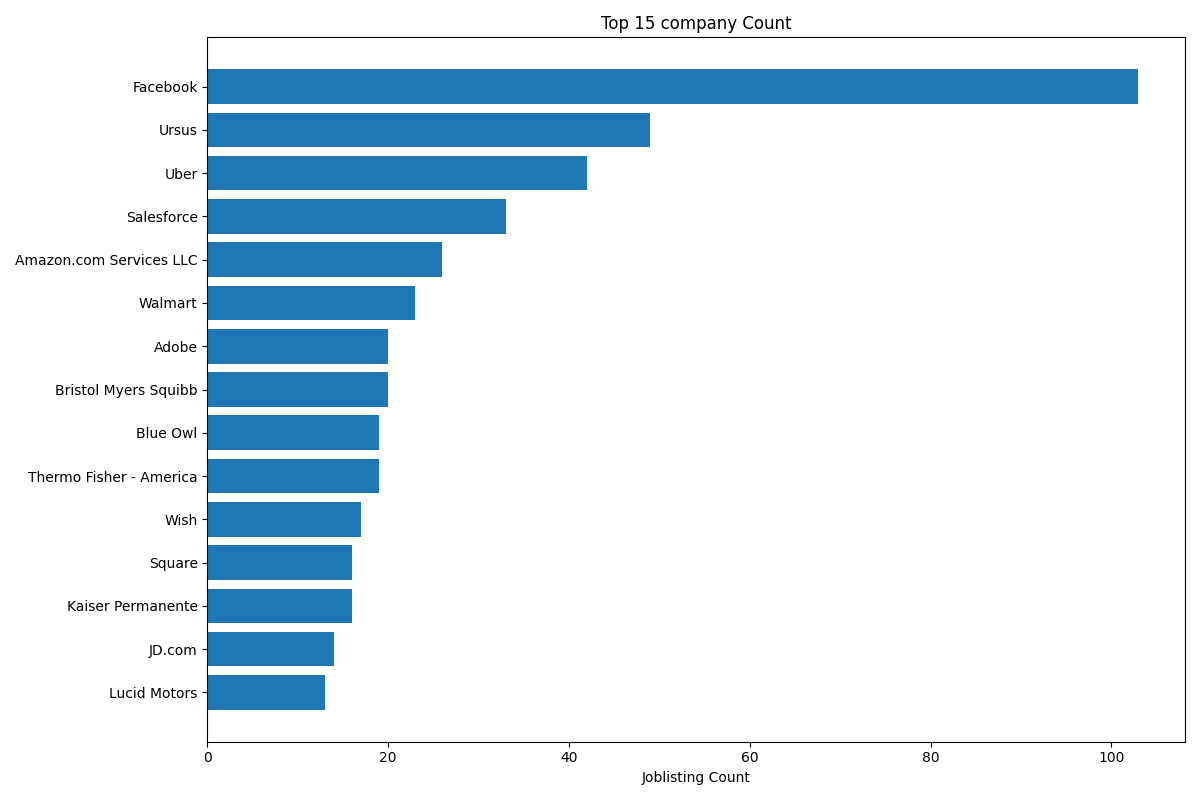

Saving figure top_15_company_count


In [116]:
# Works best with the top k=50-ish or less companies
# Which is generally the majority of the companies who post
# multiple joblistings.
def show_top_k(k, df, col, by_freq=False, figsize=(12, 8)):
    vc = df[col].value_counts()
    vc_top_k = vc[:k].sort_values(ascending=True)
    fig = plt.figure(figsize=figsize)
    if by_freq:
        plt.barh(vc_top_k.index, vc_top_k.values/df.shape[0])
    else:
        plt.barh(vc_top_k.index, vc_top_k.values)
    if by_freq:
        plt.title(f"Top {k} {col} Frequency")
    else:
        plt.title(f"Top {k} {col} Count")
    if by_freq:
        plt.xlabel("Frequency")
    else:
        plt.xlabel("Joblisting Count")
    plt.tight_layout(pad=1.2)
    plt.show()

show_top_k(15, df_5, "company")  # 443 unique companies.
save_fig("top_15_company_count")

In [117]:
# conclusions_univariate: [5, "company"].

# Showing the top k clearly illustrates the 
# prevalence of Facebook joblistings. As your eye
# moves from top to bottom, it length of the bar shortens.
# However, I also noticed the plateaus. There are 3
# distinct plateaus. After that, the plateaus grow thinner
# and thinner. It seems that certain companies tend to 
# post a certain number of joblistings. The type of companies to post
# more will determine on other factors.

<IPython.core.display.Javascript object>


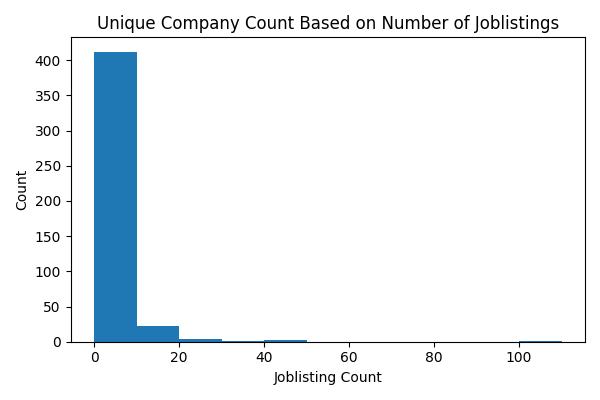

Saving figure cmpny_count_by_jl


In [118]:
fig = plt.figure(figsize=(6, 4))
plt.hist(x=(df_5.company.value_counts()).values, bins=np.arange(0, 120, 10))
plt.xlabel("Joblisting Count")
plt.ylabel("Count")
plt.title("Unique Company Count Based on Number of Joblistings")
plt.show()

save_fig("cmpny_count_by_jl")


# conclusions_univariate: [6, "company"].

# Even though categorical data isn't traditionally used with histograms, I 
# still tried it out anyways. I believe this histogram is showcasing the count 
# of joblistings from every unique company. Out of the 443 companies, a little over
# 400 of them post 0-10 joblistings! And about less than 25 unique companies
# post 10-20 joblistings. So while Facebook posted by far the most joblistings on Glassdoor.com,
# the majority of joblistings on Glassdoor.com (assuming my dataset is representative of all joblistings 
# on Glassdoor.com) are from other companies. In retrospect, this might seem really obvious. 

<IPython.core.display.Javascript object>


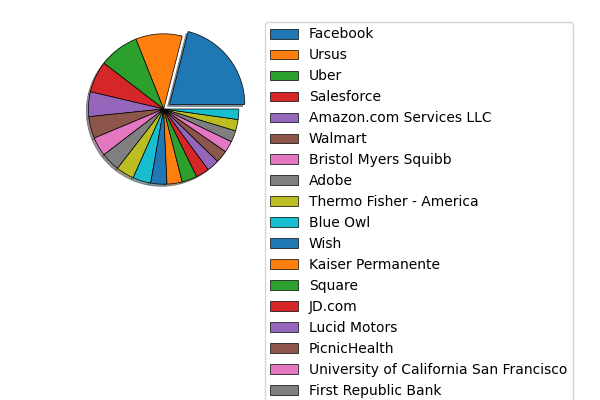

Saving figure top_20_companies_pie


In [119]:
# Works best for k < 20.
k= 20

fig = plt.figure(figsize=(6, 4))
company_vc = df_5.company.value_counts()
    
# Explode Facebook. 
explode_facebook = [0.1 if idx == "Facebook" else 0.0 for idx in company_vc.index]
    
wedges, texts = plt.pie(x=company_vc[:k], 
                        # labels=company_vc.index[:k],
                        explode=explode_facebook[:k],
                        wedgeprops={"edgecolor": "black", 
                                    "linewidth":0.5},
                        shadow=True,)
plt.legend(wedges, 
           company_vc.index[:k], 
           loc="best",
           bbox_to_anchor=(1,0,0.5,1))
plt.tight_layout()
plt.show()
    
# Note: the legend goes from the exploded piece counter-clockwise.

save_fig("top_20_companies_pie")

<IPython.core.display.Javascript object>


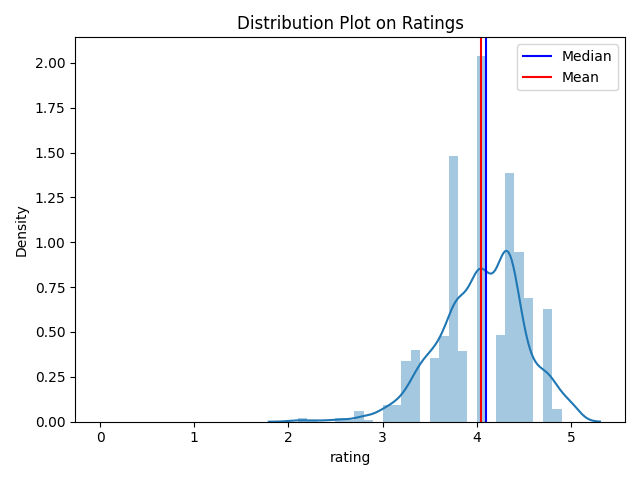

C:\Users\VTSB\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Saving figure rating_dist


In [120]:
plt.figure()
sns.distplot(a=df_5.rating, bins=np.arange(0, 5, 0.1))
plt.title("Distribution Plot on Ratings")
plt.axvline(df_5.rating.median(), color="blue", label="Median")
plt.axvline(df_5.rating.mean(), color="red", label="Mean")
plt.legend()
save_fig("rating_dist")

# conclusions_univariate: [4, "rating"].

# This distribution plot supports the conclusion I made earlier about the ratings.
# There is also a gap in 3.9 and 4.2. However, this distribution plot does show
# peakness and a somewhat bell-like curve shape. The curve is skewed leftwards as
# there are either no ratings in the lower end and/or the ratings are not dense.
# Moreover, the mean and median seem to line up pretty well with the densest bar.

<IPython.core.display.Javascript object>


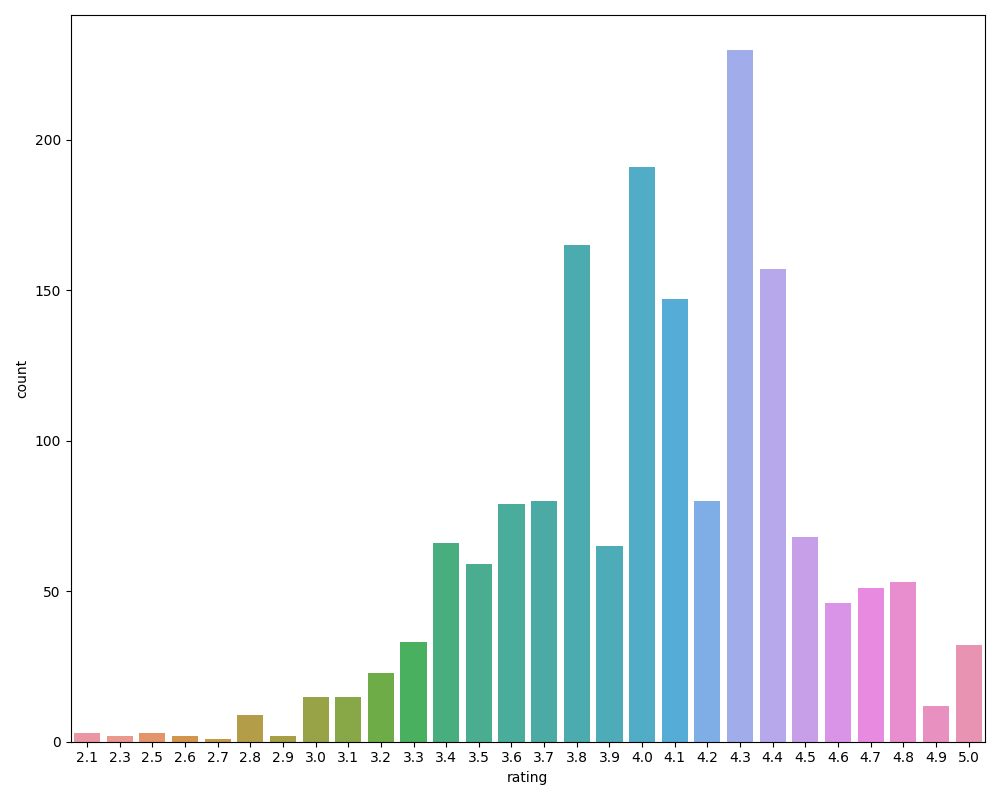

Saving figure rating_countplot


In [121]:
plt.figure(figsize=(10, 8))
sns.countplot(x=df_5.rating)
save_fig("rating_countplot")

# conclusions_univariate: [5, "rating"].

# Much like the distribution plot above, this is "skewed" left.
# There are few joblistings with low ratings and mostly reside
# within 1 standard deviation from the mean (a visual estimate).

<IPython.core.display.Javascript object>


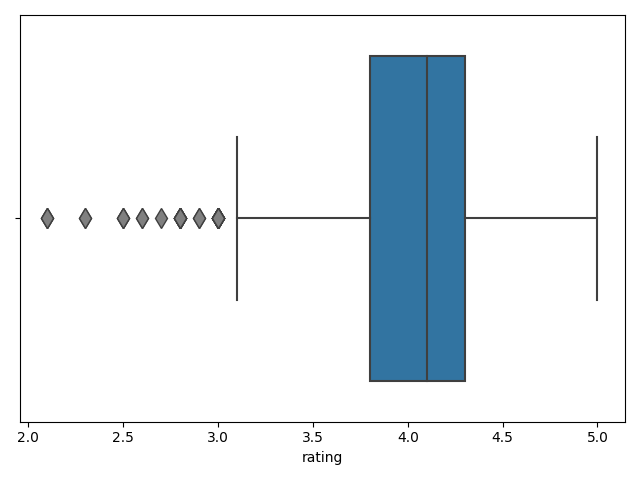

Saving figure rating_boxplot


In [122]:
plt.figure()
sns.boxplot(x=df_5.rating, flierprops = dict(markerfacecolor = '0.5', markersize = 10))
save_fig("rating_boxplot")

# conclusions_univariate: [6, "rating"].

# Yep, these are outliers (though maybe outliers are calculated via Q1 - 1.5 * IQR?).
# These outliers aren't very dense in nature and skew the distribution. 

<IPython.core.display.Javascript object>


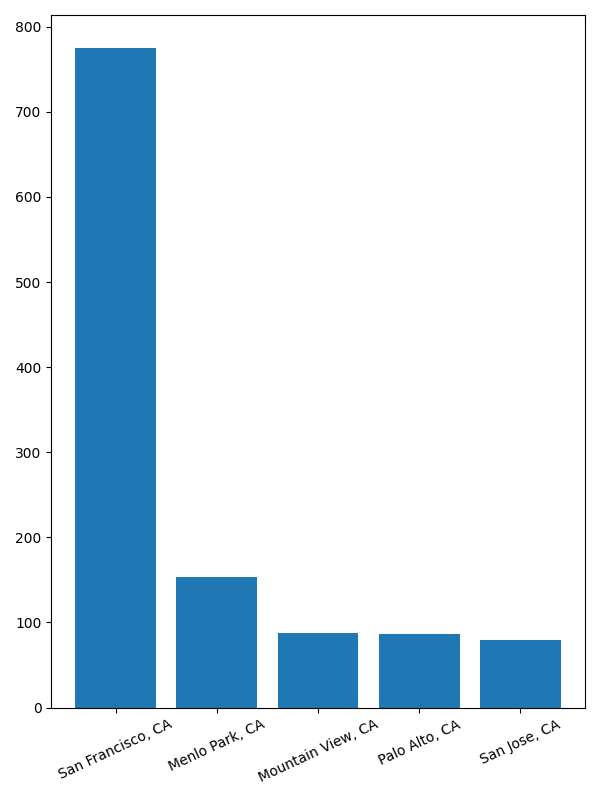

Saving figure hq_bar_count


In [123]:
plt.figure(figsize=(6, 8))
plt.bar(x=df_5.headquarters.value_counts().index[:5], 
        height=df_5.headquarters.value_counts().values[:5])
plt.xticks(rotation = 25)
save_fig("hq_bar_count")

<IPython.core.display.Javascript object>


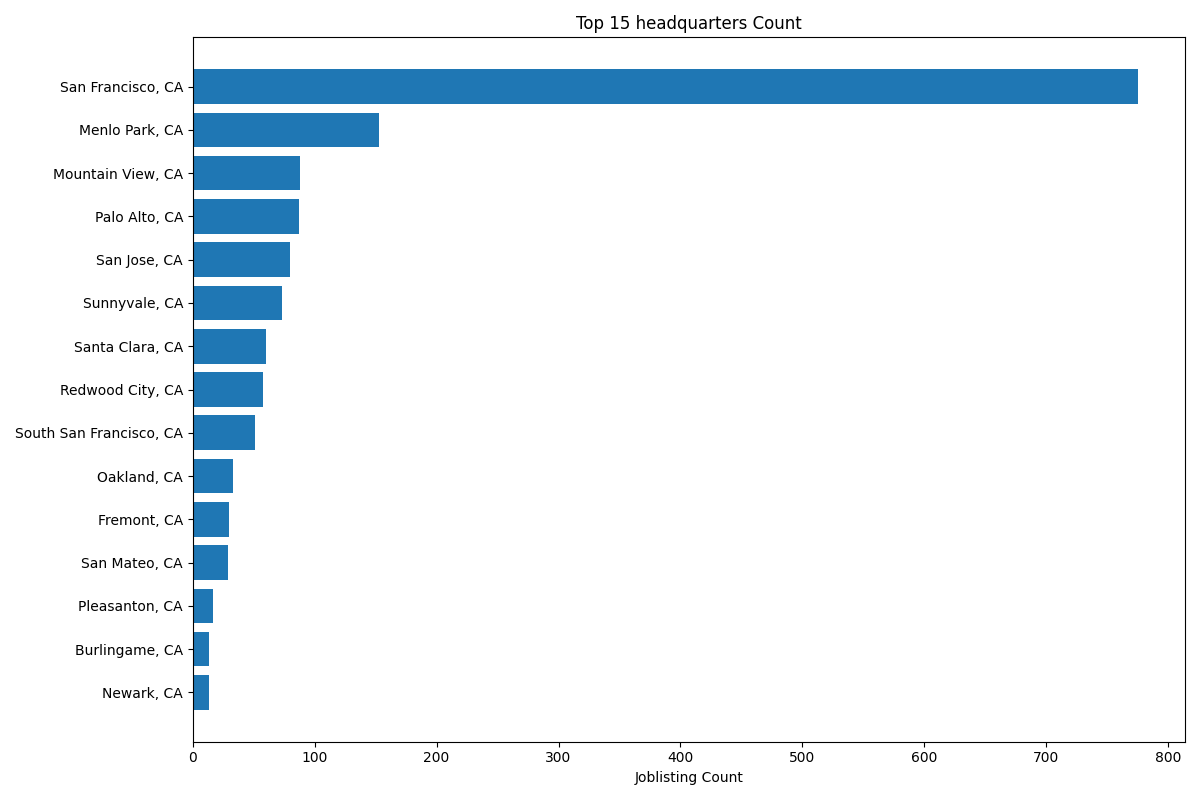

Saving figure top_15_hq


In [124]:
show_top_k(15, df_5, "headquarters")
save_fig("top_15_hq")

<IPython.core.display.Javascript object>


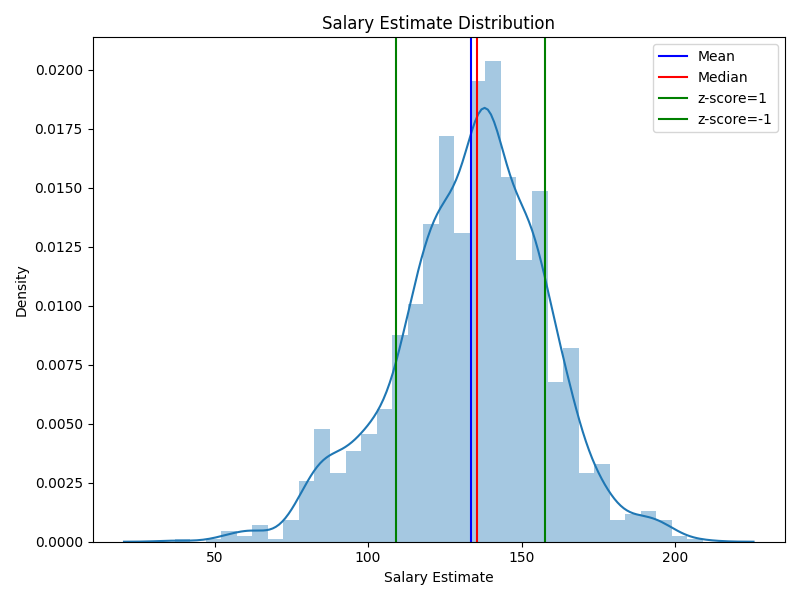

C:\Users\VTSB\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Saving figure salary_est_dist


In [125]:
plt.figure(figsize=(8, 6))
sns.distplot(x=df_5["salary estimate"])
plt.axvline(df_5["salary estimate"].mean(), color="blue", label="Mean")
plt.axvline(df_5["salary estimate"].median(), color="red", label="Median")
plt.axvline(df_5["salary estimate"].mean() + df_5["salary estimate"].std(), color="green", label="z-score=1")
plt.axvline(df_5["salary estimate"].mean() - df_5["salary estimate"].std(), color="green", label="z-score=-1")
plt.xlabel(xlabel="Salary Estimate")
plt.title("Salary Estimate Distribution")
plt.legend()
plt.show()
save_fig("salary_est_dist")

# conclusions_univariate: [6, "salary estimate"].

# This does seem much like a normal distribution with a slight left skewness, and a peak.
# It seems that the peak is around the 140k-150k salary range which is really close 
# to the mean and median.

<IPython.core.display.Javascript object>


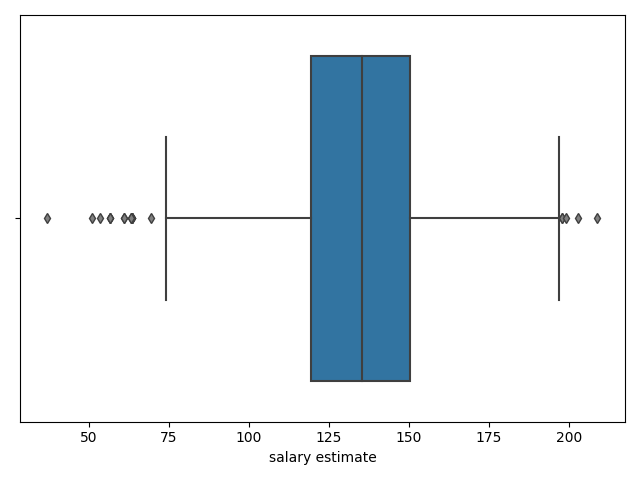

Saving figure salary_est_boxplot


In [126]:
plt.figure()
sns.boxplot(x=df_5["salary estimate"], flierprops = dict(markerfacecolor = '0.5', markersize = 5))
plt.show()
save_fig("salary_est_boxplot")

In [127]:
# Considering how few unique values there are, we
# don't need a visualizer.
df_5["job type"].value_counts()

Full-time     1654
Part-time       24
Contract         7
Internship       4
Name: job type, dtype: int64

<IPython.core.display.Javascript object>


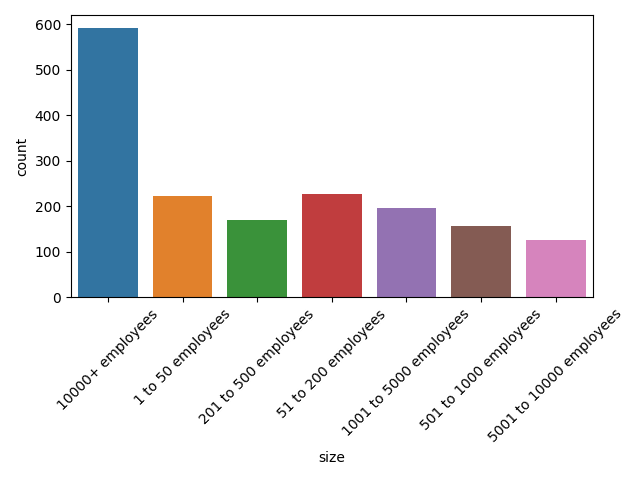

Saving figure size_bar


In [128]:
plt.figure()
sns.countplot(x=df_5["size"])
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
save_fig("size_bar")

In [129]:
# Considering how few unique values there are, we
# don't need a visualizer.
df_5.type

0            company - private
1            company - private
2            company - private
3             company - public
4             company - public
                 ...          
1684    nonprofit organization
1685      college / university
1686          company - public
1687          company - public
1688                  contract
Name: type, Length: 1689, dtype: object

<IPython.core.display.Javascript object>


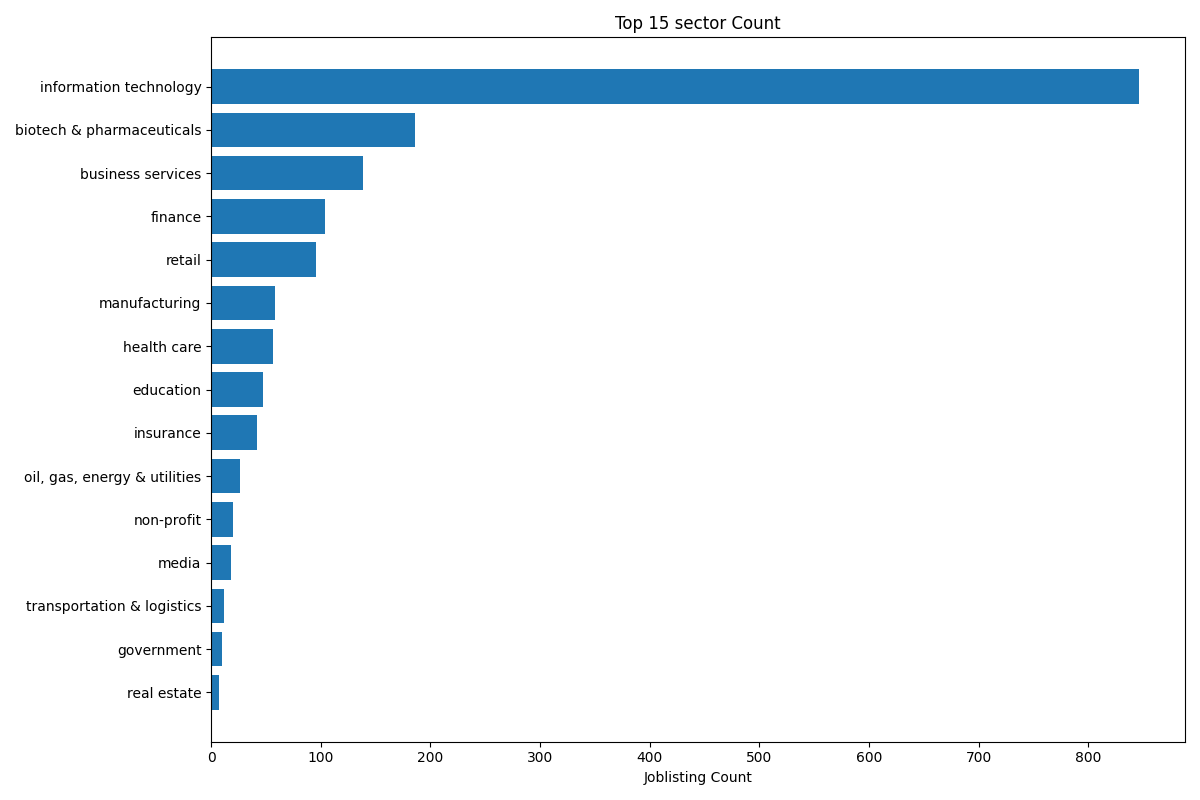

Saving figure top_15_sector_count


In [130]:
show_top_k(15, df_5, "sector")
plt.tight_layout()
plt.show()
save_fig("top_15_sector_count")

<IPython.core.display.Javascript object>


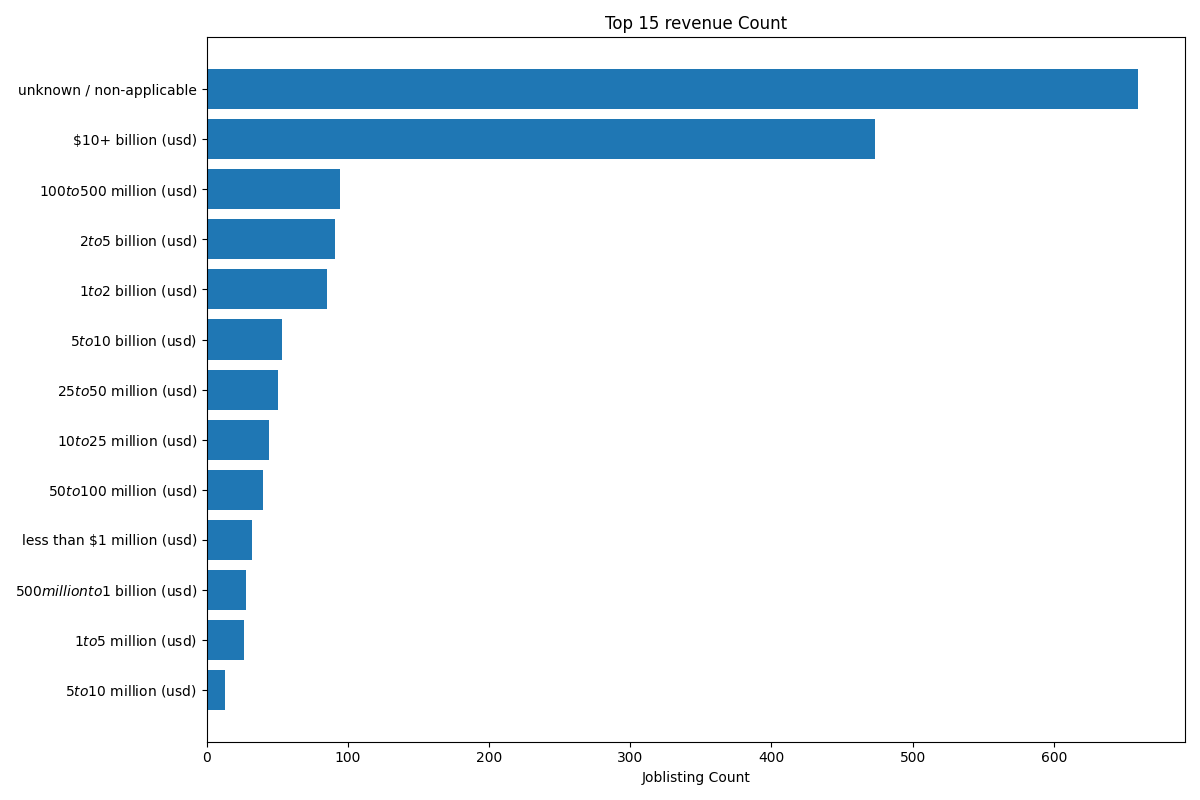

Saving figure top_15_revenue_count


In [131]:
show_top_k(15, df_5, "revenue")
plt.tight_layout()
plt.show()
save_fig("top_15_revenue_count")

## Multivariate Non-Graphical Analysis

In [132]:
df_5.head()

,company,rating,headquarters,salary estimate,job type,size,type,sector,revenue
0,Indeed,4.3,"San Francisco, CA",209.0,Full-time,10000+ employees,company - private,information technology,$2 to $5 billion (usd)
1,Indeed,4.3,"San Francisco, CA",143.0,Full-time,10000+ employees,company - private,information technology,$2 to $5 billion (usd)
2,Abl Schools,4.0,"San Francisco, CA",140.0,Full-time,1 to 50 employees,company - private,business services,unknown / non-applicable
3,"Amazon Web Services, Inc.",3.8,"Palo Alto, CA",115.0,Full-time,10000+ employees,company - public,information technology,$10+ billion (usd)
4,Thermo Fisher - America,3.8,"San Francisco, CA",134.5,Full-time,10000+ employees,company - public,biotech & pharmaceuticals,$10+ billion (usd)


In [133]:
df_5.columns

Index(['company', 'rating', 'headquarters', 'salary estimate', 'job type',
       'size', 'type', 'sector', 'revenue'],
      dtype='object')

In [134]:
df_5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1689 entries, 0 to 1688
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   company          1689 non-null   object 
 1   rating           1689 non-null   float64
 2   headquarters     1689 non-null   object 
 3   salary estimate  1689 non-null   float64
 4   job type         1689 non-null   object 
 5   size             1689 non-null   object 
 6   type             1689 non-null   object 
 7   sector           1689 non-null   object 
 8   revenue          1689 non-null   object 
dtypes: float64(2), object(7)
memory usage: 118.9+ KB


In [135]:
df_5.describe()

,rating,salary estimate
count,1689.000000,1689.000000
mean,4.047425,133.381883
std,0.454618,24.253099
min,2.100000,37.000000
25%,3.800000,119.500000
50%,4.100000,135.500000
75%,4.300000,150.500000
max,5.000000,209.000000


In [136]:
df_5.corr()


# conclusions_multivariate: [0, "rating"].

# Seems like rating doesn't have much correlation to salary estimate
# as the Pearson correlation coefficient isn't near 1 or -1. In fact,
# it is closer to 0 (even though it might show some weak positive correlation
# to salary estimate, which does make sense as higher rated companies tend
# to compensate better).

,rating,salary estimate
rating,1.000000,0.177916
salary estimate,0.177916,1.000000


In [137]:
# Even though our ultimate objective is to observe salary estimate,
# we will also look at correlations between other variables
# since this is EDA.

agg_funcs = ["mean", "median", "count", "min", "max"]
size_by_rating = df_5.groupby(["size"]).rating.agg(agg_funcs)
size_by_rating.name = "Company Size By Rating Stats"

# Creating MultiIndex for visual clarity.
size_by_rating.columns = pd.MultiIndex.from_tuples([("rating", agg_func) 
                                                     for agg_func in agg_funcs])

# Finding the midpoint between the min and the max.
size_by_rating[("rating", "min_max_midpt")] = (size_by_rating[("rating", "min")] + 
                                               size_by_rating[("rating", "max")])/2

# Sorting the index.
size_idx = dict(zip(list(size_by_rating.index), 
                    [int(re.search(r"\d+", x).group(0))
                     for x in list(size_by_rating.index)]))
size_idx_sorted = dict(sorted(size_idx.items(), key=lambda item: item[1]))
size_by_rating = size_by_rating.reindex(size_idx_sorted.keys())

# Number of outliers for each unique company size.
n_zscore = 2
size_n_outliers = [np.sum(arr) 
                   for arr in [np.abs(stats.zscore(df_5[df_5["size"] == x]
                                                   ["rating"])) > n_zscore
 for x in size_idx_sorted.keys()]]
size_by_rating[("rating", "n_outliers")] = size_n_outliers

size_by_rating


# conclusions_multivariate: [0, "size"].

# For the most part, all rating means stay by the 3.9-4.0 range for companies
# of all unique sizes. However, it does seem that companies with
# 1 to 50 employees has a slightly higher average rating at 4.2. In fact,
# the median rating for companies with 1-50 employees is 4.35, higher than
# all the other unique values. The higher median could be a result of 
# the 16 outliers dragging down the mean. Perhaps, the higher rating for 
# smaller companies comes from the fact that they have better working environments.
# Or perhaps, they are more flexible than larger companies. Or perhaps, they 
# can more easily cater to each individual worker's needs. There is a wealth
# of possibilities. It also seems that smaller companies in general (<=500)
# are receiving 5.0 ratings. I noticed the midpoints of the min and max are 
# consistently lower than the mean and median. It seems that lots of companies,
# regardless of size, have certain outliers that rate them lower than the norm.
# Each unique size value has outliers except for 2 of them. Companies with over
# 10000 employees have an especially large number of outliers. This could be due to
# a greater number of mixed opinions over how large corporations communicate with employees,
# job seekers, and their consumers and other groups.

rating                                       \
                             mean median count  min  max min_max_midpt   
size                                                                     
1 to 50 employees        4.214414   4.35   222  2.3  5.0          3.65   
51 to 200 employees      4.149339   4.20   227  2.1  5.0          3.55   
201 to 500 employees     4.057310   4.10   171  2.5  5.0          3.75   
501 to 1000 employees    3.903822   3.90   157  3.0  4.7          3.85   
1001 to 5000 employees   3.927551   4.00   196  3.1  4.8          3.95   
5001 to 10000 employees  4.029600   4.10   125  3.4  4.6          4.00   
10000+ employees         4.024365   4.10   591  3.1  4.7          3.90   

                                    
                        n_outliers  
size                                
1 to 50 employees               16  
51 to 200 employees             11  
201 to 500 employees             7  
501 to 1000 employees            0  
1001 to 5000 employees          14  
5001 to 10000 employees          0  
10000+ employees                28

In [138]:
df_5.pivot_table(values="salary estimate", index="size", columns="revenue").reindex(size_idx_sorted.keys())

revenue,$1 to $2 billion (usd),$1 to $5 million (usd),$10 to $25 million (usd),$10+ billion (usd),$100 to $500 million (usd),$2 to $5 billion (usd),$25 to $50 million (usd),$5 to $10 billion (usd),$5 to $10 million (usd),$50 to $100 million (usd),$500 million to $1 billion (usd),less than $1 million (usd),unknown / non-applicable
size,,,,,,,,,,,,,
1 to 50 employees,NaN,142.833333,120.750000,NaN,126.000000,NaN,137.000000,NaN,135.250000,NaN,NaN,124.051724,130.207865
51 to 200 employees,NaN,137.750000,109.384615,NaN,121.700000,NaN,105.857143,NaN,145.944444,128.722222,NaN,120.333333,129.321875
201 to 500 employees,NaN,122.538462,118.437500,NaN,133.937500,NaN,115.892857,NaN,NaN,116.000000,166.000000,NaN,132.616162
501 to 1000 employees,141.800000,NaN,143.300000,NaN,119.382353,141.000000,NaN,128.375000,NaN,132.115385,142.500000,NaN,132.771739
1001 to 5000 employees,126.833333,NaN,NaN,123.600000,124.851064,149.750000,118.250000,144.000000,NaN,98.000000,134.611111,NaN,143.652941
5001 to 10000 employees,144.858974,114.750000,NaN,136.178571,NaN,126.863636,NaN,174.500000,NaN,NaN,136.100000,NaN,110.418919
10000+ employees,119.772727,NaN,87.500000,142.841686,NaN,134.975000,104.425000,147.402174,NaN,NaN,97.900000,NaN,93.277778


## Testing